<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project3_Avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do Time Series on this 
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/analyticsvidhya

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

In this project, we are going to predict the AveragePrice as a regression problem and predict the Region as a Classification problem.

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold



## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from scipy.stats import norm


import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are  a lot of NaN rows.

In [ ]:
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [ ]:
#Checkig the number of rows without NaN
16467 - 14951

1516

In [ ]:
#Dropping the NaN rows as instructed in the problem statement
#And dropping the unnamed column as it is not required
df = data.iloc[:1517].drop(['Unnamed: 0'], axis=1)

Checking the head and tail

In [ ]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
#checking the Total Volume for row #1
64236.62-(1036.74+54454.85+48.16)

8696.870000000003

1. The Total Volumns is the sum of values in columns '4046', '4225', '4770' and 'Total Bags'.
2. The Total Bags is split into 'Small Bags', 'Large Bags' and 'XLarge Bags'

In [ ]:
df.shape

(1517, 13)

There are 1517 rows and 13 columns in the dataset.


In [ ]:
data[data['Date'] == '27-12-2015'].shape

(21, 14)

Observations:
1. There are several rows for a single date. It could be that each region has each dates.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 154.2+ KB


Except Date, type and region, all the columns are float type.
There are no missing values. 

In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Yes there are no missing values.

In [ ]:
df['Date'].value_counts()

12-04-2015    34
05-04-2015    34
19-04-2015    33
10-05-2015    32
29-03-2015    32
              ..
31-07-2016     3
04-09-2016     3
07-08-2016     3
19-06-2016     3
11-09-2016     2
Name: Date, Length: 104, dtype: int64

The dates are 7 days apart. They are weekly data.

In [ ]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

The 'type' variable has only one value 'conventional' in it. So its not helful. We can remove this variable.

In [ ]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

This dataset shows data for 2 years -> 2015 and 2016.

The data is not balanced for the 2 years. Data for 2015 is a lot more than data for 2016.

Investigate if the prices are significantly different amoung the years.

In [ ]:
df['region'].nunique()

51

The dataset has 51 regions.

###Statistical Description

In [ ]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


Observations:
1. There are 104 unique dates in the Date variable. Which means there are 104 weeks' data (i.e., 2 years of data). Although 2016 showed very low number of datapoints. It might help us find some insights if we extract the weeks out of this date column.
2. The AveragePrice is ranging from 0.49 to 1.68. Although the mean is slightly to the left of the median, it does not look skewed since the difference between min & 25% and 75% & max are equal. Infact the data seem to be well distributed within each of the quartiles.
3. The total volume is ranging from 38750.74 to 44655460. The data is skewed towards the right side. This needs more investigation.
4. The PLU 4046 is ranging from 467.72 to 18933040. This data is also right skewed.
5. The PLU 4225 ranges from 1783.77to 18956480. This data is also right skewed but not as much as PLU 4046 and Total volume.
6. The PLU 4770 is ranging from 0 to 1381516. This data is also right skewed.
7. The Total Bags is ranging from 3311.77 to 6736304. The data is right skewed.
8. The Small Bags is ranging from 3311.77 to 5893642. The data is right skewed.
9. The Large Bags is ranging from 0 to 1121076. The data is right skewed.
10. The XLarge bags is ranging from 0 to 10807279. This data is right skewed.
11. The type variable has only 1 category.
12. There are 51 categories in the region. California is repeating 76 times.

From the description we can see that the data might have outliers. This needs to be investigated.

In [ ]:
df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekofyear
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,52
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,51
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,50
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,24
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,48


In [ ]:
df['weekofyear'].nunique()

51

Looks like we are missing a particular week. There has to be 52 weeks

In [ ]:
df['weekofyear'].unique()

array([52, 51, 50, 24, 48, 47, 46, 33,  2, 43, 42, 15, 39, 38, 37, 35, 34,
        6, 30, 29, 19, 26, 25, 28, 22, 21, 20, 41, 10, 17, 16, 49, 13, 12,
       11, 32,  1,  8,  7, 31,  4,  3, 44, 14, 45, 23, 36, 40,  9, 18, 27])

Yes. We are missing the 5th week of the year in both 2015 and 2016.

In [ ]:
df[df['weekofyear'] == 5]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekofyear


Check if Average price changes based on Date

In [ ]:
df['month_year'] = df['Date'].apply(lambda x:x[3:] )
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month_year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12-2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12-2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12-2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12-2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11-2015


In [ ]:
df['month_year'] = pd.to_datetime(df['month_year'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

There are many weekly avg prices in the dataset based on regions.

Lets look at the average of the average weekly prices.

In [ ]:
weekly_avg_price = df.groupby(by='Date').mean()
weekly_avg_price.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekofyear
Date,,,,,,,,,,,
2015-01-02,0.950833,2.863453e+06,1.239815e+06,1.184574e+06,69865.849583,369198.334167,284210.400833,82855.929167,2132.004167,2015.0,1
2015-01-03,1.044333,1.894995e+06,7.165292e+05,8.139566e+05,61866.595667,302642.549667,250176.751000,48713.552000,3752.246667,2015.0,1
2015-01-11,1.023182,9.349731e+05,3.045712e+05,4.172778e+05,47011.151818,166112.889091,124483.563636,40331.143636,1298.181818,2015.0,2
2015-01-18,1.108571,2.193611e+06,9.342185e+05,8.491908e+05,50529.433810,359672.442857,297050.695714,62052.510952,569.236190,2015.0,3
2015-01-25,1.080455,1.998214e+06,8.598672e+05,7.445960e+05,42420.720909,351330.100455,290110.485000,60767.523182,452.092273,2015.0,4


In [ ]:
weekly_avg_price['Date'] = weekly_avg_price.index

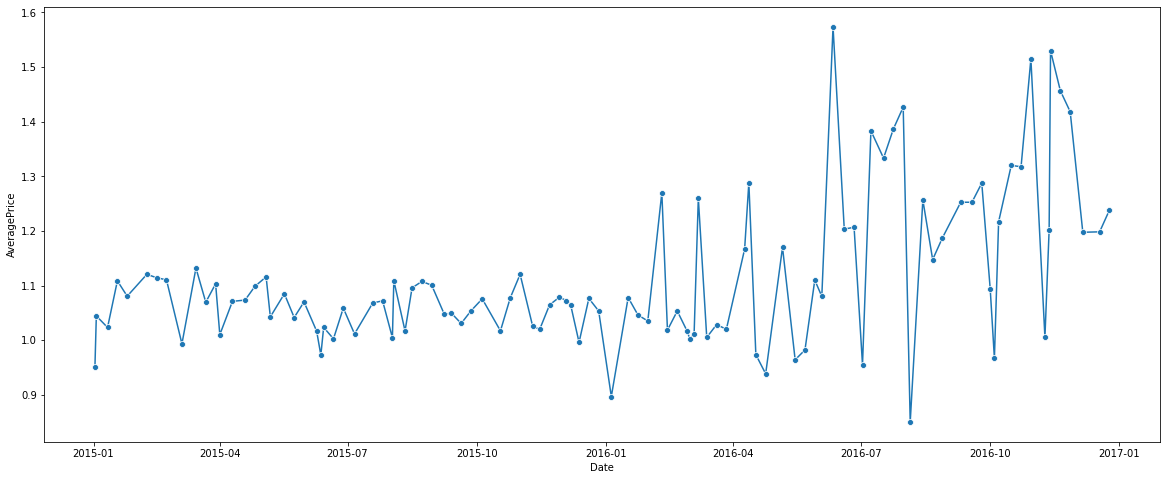

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=weekly_avg_price, x= 'Date', y='AveragePrice', marker='o')

plt.show()

1. The AveragePrice is highest in the 2nd week of july 2016.
2. The AveragePrice is the lowest in the 2nd week of August 2016.
3. The AveragePrice seem to fluctuate by a large margin in later part of 2016.

Looking at the Monthly average prices for different years separately

In [ ]:
monthly_avg_price = weekly_avg_price.resample('1M').mean()
monthly_avg_price['Date'] = monthly_avg_price.index

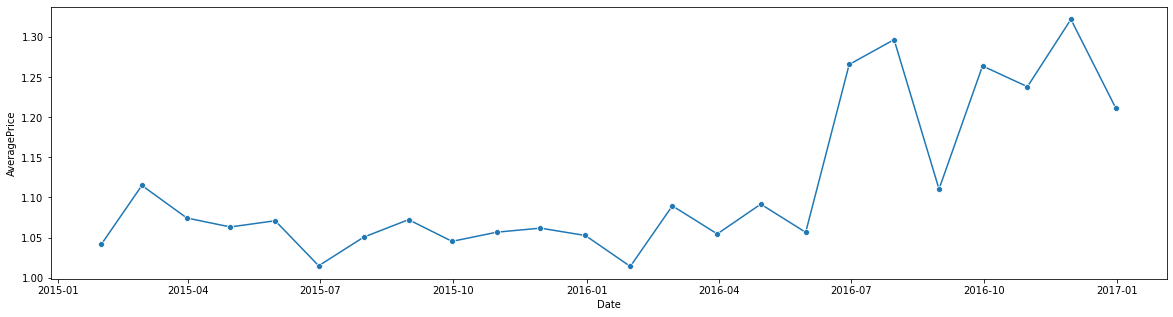

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=monthly_avg_price, x= 'Date', y='AveragePrice', marker='o')

plt.show()

Observations:
1. Although the highest average price was in te 2nd week of July 2016, the highest monthly average price is highest in Dec 2016 because the 2nd and 3rd highest weekly average prices are in Dec 2016.
2. The lowest monthly average price is in July 2015 and feb 2016.
3. The highest increase in the monthly average price (from approx 1.06 to approx 1.27) happened between June 2016 and July 2016.
4. The highest drop in the monthly average price happened between Aug 2016 and Sep 2016.
5. The overall trend seem to be an increase in the average monthly price of avacado.

In [ ]:
weekly_avg_price.resample('1Y').mean()['AveragePrice']

Date
2015-12-31    1.058446
2016-12-31    1.169087
Freq: A-DEC, Name: AveragePrice, dtype: float64

We can see that the average price of avacado has increased to 1.17 in 2016 from 1.06 in 2015.

In [ ]:
weekly_avg_price['month'] = pd.to_datetime(weekly_avg_price['Date']).apply(lambda x: x.month)

Lets now look at how the trend varies based on months not separating them based on year.

In [ ]:
months = weekly_avg_price.groupby(by='month').mean()

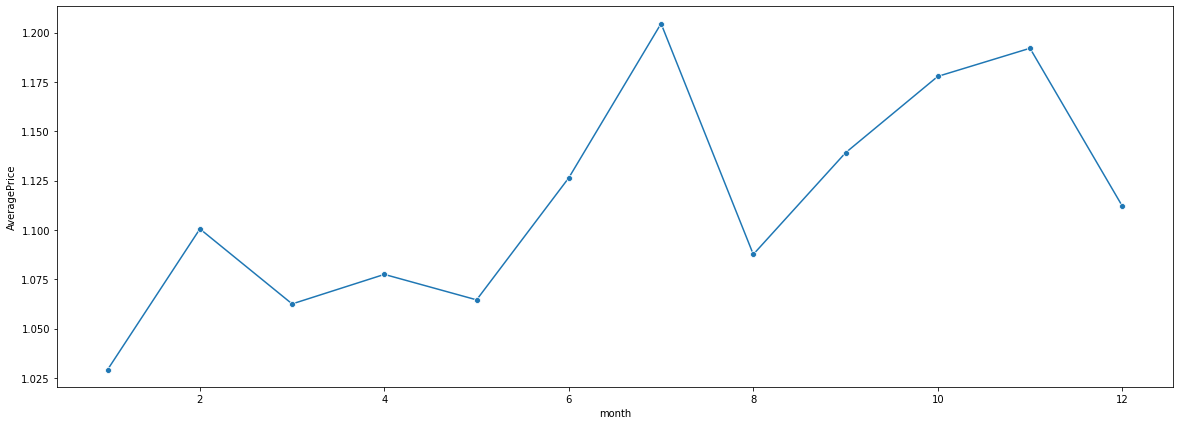

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=months.index, y=months['AveragePrice'], marker='o')
plt.show()

Observations:
1. Most increase in the price is in the second half of the year. This looks like is happening due to a supply demand gap. 

Research reference [here](https://ehpea.org/overview-global-avocado-market/#:~:text=This%20price%20increase%20is%20due,to%20be%20in%20balance%20again.&text=188%2C513%20tons%20of%20avocados%20will%20be%20available%20for%20export%20to%20other%20markets). 

2. The increase in february seem to be because "January through March is the best time of year for flavor. It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love."

Research reference [here](https://www.weaverstreetmarket.coop/peak-season-for-avocados/#:~:text=Avocados%20are%20available%20year%20round,texture%20that%20we%20all%20love).

In [ ]:
sns.set(font_scale=1)

### Distribution of the Continuous Variables

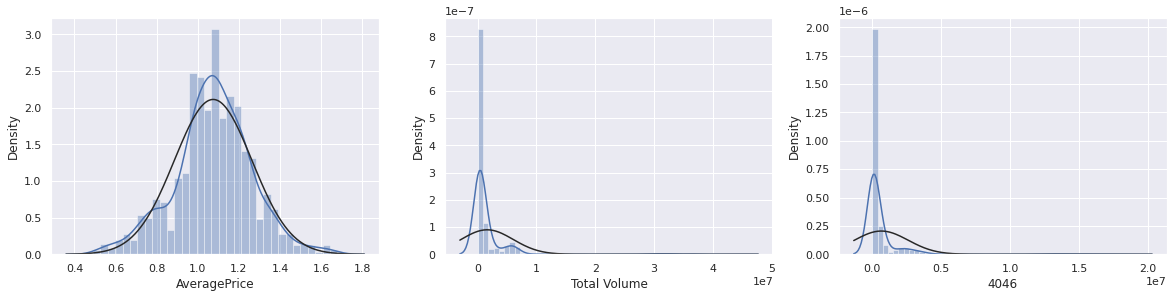

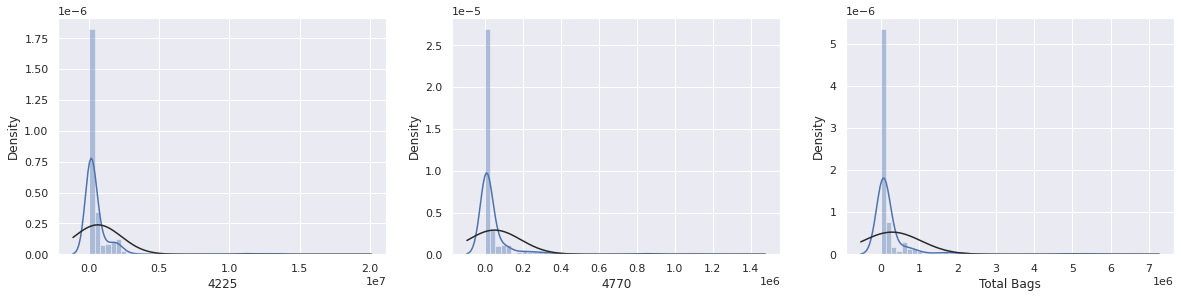

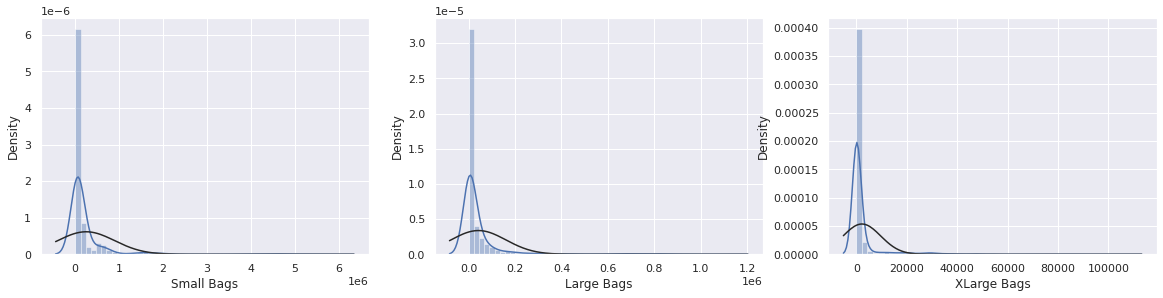

In [ ]:
i=1
sns.set(rc={"figure.figsize": (20, 20)})
for col in ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']:
      
       plt.subplot(4,3,i)
       sns.distplot(df[col], fit=norm)
       if i == 3:
         i=1
         plt.show()
       else:
         i+=1
         

       
        

Observations:
1. Except for the AveragePrice, all other variables are right skewed.

### Frequency of the Categorical/Discrete variables

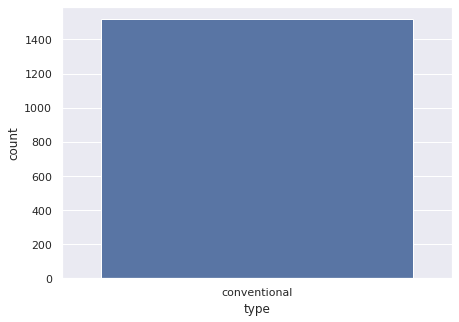

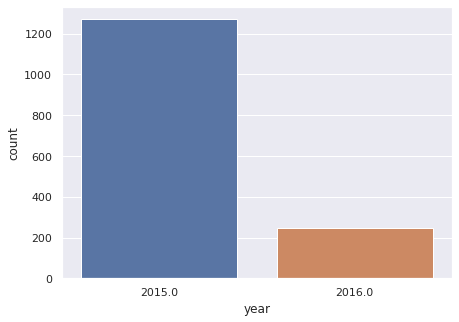

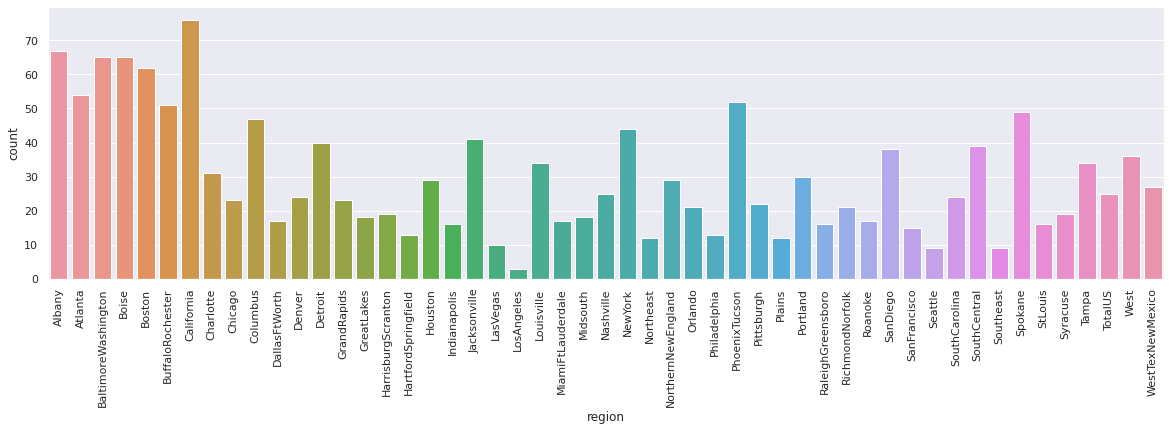

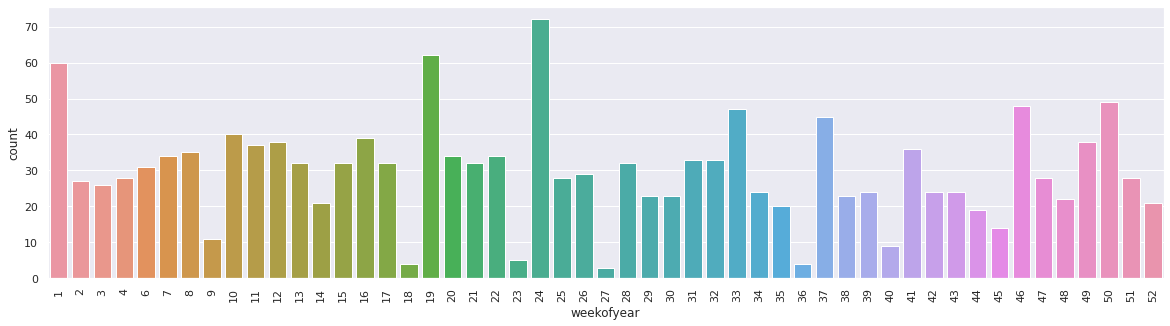

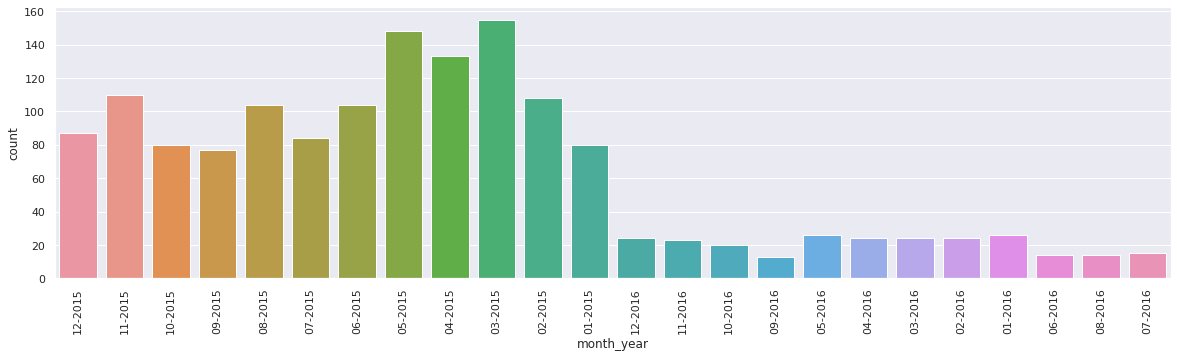

In [ ]:
for col in ['type', 'year','region', 'weekofyear', 'month_year']:
  if df[col].nunique() > 4:
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
  else:
    plt.figure(figsize=(7,5))
  
  sns.countplot(df[col])
  plt.show()

Observations:
1. 2016 has much lesser data than 2015.
2. California occurs in the dataset the most and LosAngeles the least.
3. Most of the Regions have low count. Need more investigation.
4. Week 5 has no data. very less contribution from Weeks 18, 23, 27 and 36.
5. Since the data in 2016 is low, the monthly contribution from 2016 is also pretty low when compared to 2015.

### Region vs AveragePrice for the years

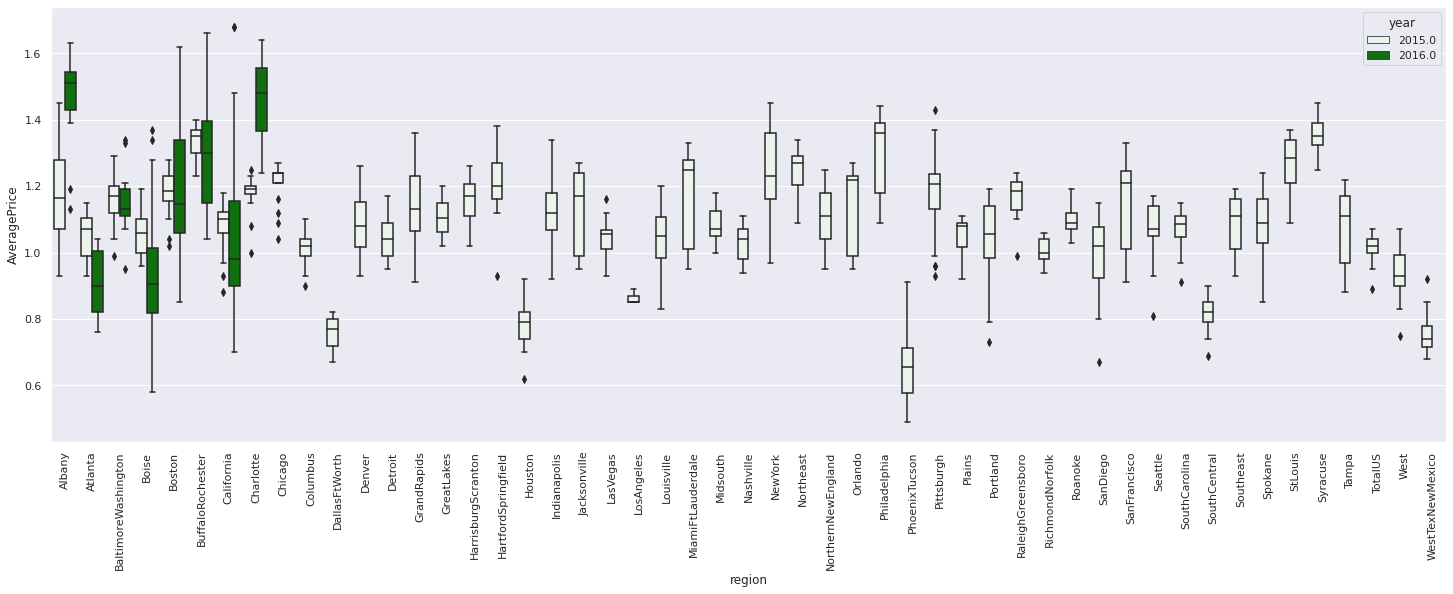

In [ ]:

plt.figure(figsize=(25,8))
sns.boxplot(x="region", y="AveragePrice",hue = 'year', color='green', data=df[['AveragePrice','region','year']])
plt.xticks(rotation=90)
plt.show()

Observations:
1. There is no data from 2016 for the regions other than [Albany, Atlanta, BaltimoreWashington, Boise, Boston, BuffaloRochester, California and Charlotte]
2. The Average Prices are on the Higher side in Albany(particularly in 2016), Boston, BuffaloRochester, California, Charlotte, NewYork, Philadelphia and Syracuse.
3. The Average Prices are on the lower side in dallasFTWorth, Houston, PhoenixTucson and WestTexNewMexico.


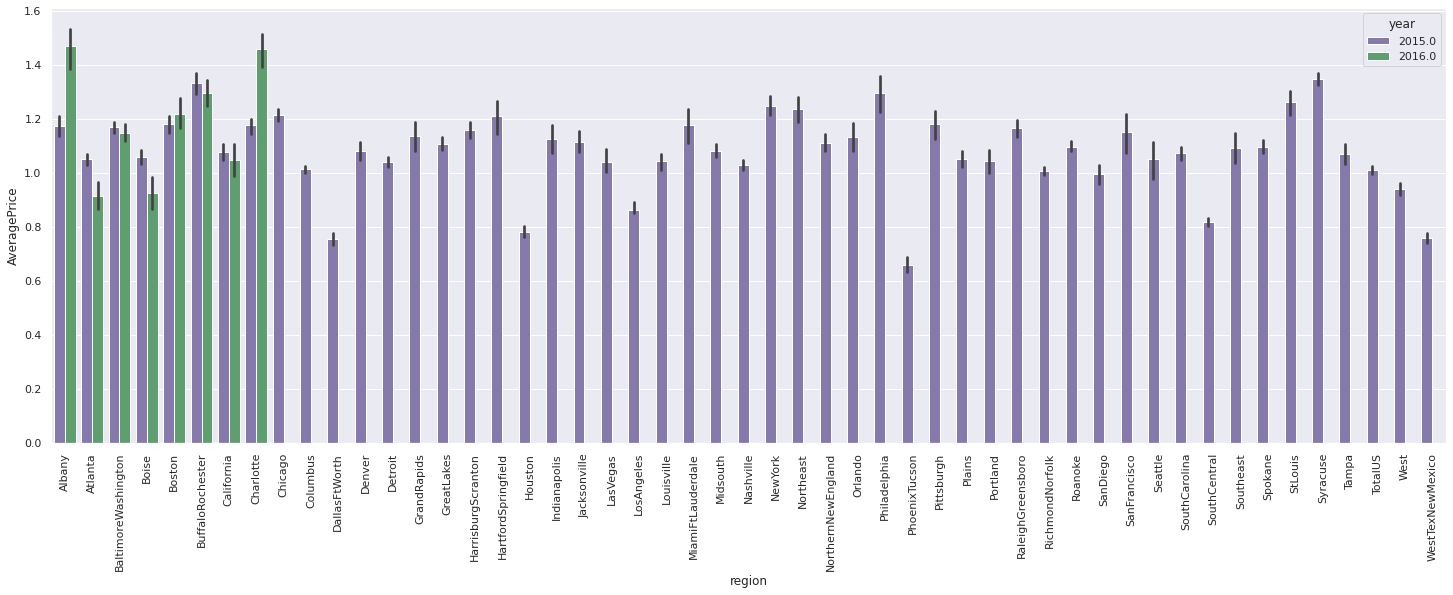

In [ ]:

plt.figure(figsize=(25,8))
sns.barplot(x="region", y="AveragePrice",hue = 'year',palette= ['m','g'], data=df[["AveragePrice",'region','year']])
plt.xticks(rotation=90)
plt.show()

Observations:
1. Data for 2016 is missing for a lot of regions.

### Region vs Total Volume for the years

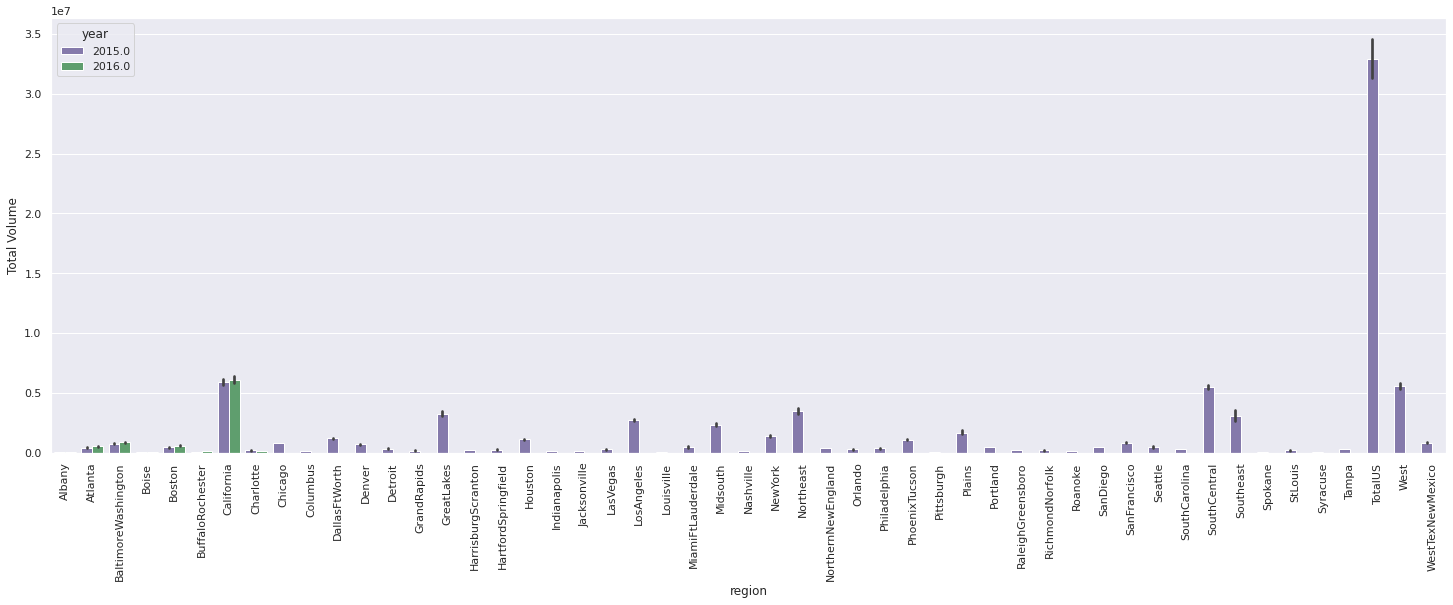

In [ ]:

plt.figure(figsize=(25,8))
sns.barplot(x="region", y="Total Volume",hue = 'year',palette= ['m','g'], data=df[["Total Volume",'region','year']])
plt.xticks(rotation=90)
plt.show()

Observations:
1. Clearly TotalUS is an outlier.

###Outliers

In [ ]:
df[df['region']=='TotalUS']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekofyear,month_year
1182,2015-06-21,1.02,35734613.90,14699604.93,13244466.60,1326422.56,6464119.81,5517909.51,898027.46,48182.84,conventional,2015.0,TotalUS,25,06-2015
1183,2015-06-14,0.98,37026085.75,16383685.07,12821015.03,1085081.61,6736304.04,5893641.72,822399.78,20262.54,conventional,2015.0,TotalUS,24,06-2015
1184,2015-07-06,1.00,36549995.66,16529797.60,12582265.21,1144715.95,6293216.90,5304562.91,943995.95,44658.04,conventional,2015.0,TotalUS,28,06-2015
1185,2015-05-31,1.03,33720159.09,15503613.33,11599634.02,903908.35,5713003.39,4967231.63,726046.25,19725.51,conventional,2015.0,TotalUS,22,05-2015
1186,2015-05-24,1.04,35344183.15,16000107.80,12513821.19,899779.92,5930474.24,5094263.38,815628.55,20582.31,conventional,2015.0,TotalUS,21,05-2015
1187,2015-05-17,1.06,32027686.15,14615941.59,11003341.22,963549.53,5444853.81,4747544.74,660983.55,36325.52,conventional,2015.0,TotalUS,20,05-2015
1188,2015-10-05,1.02,36400886.58,16215328.75,13509064.65,858145.45,5818347.73,4991625.82,816629.40,10092.51,conventional,2015.0,TotalUS,41,05-2015
1189,2015-03-05,0.96,41291704.39,17787611.93,16602589.04,1118329.50,5783173.92,4647155.48,1110987.23,25031.21,conventional,2015.0,TotalUS,10,05-2015
1190,2015-04-26,1.07,30894157.80,13833715.28,10867403.08,889732.20,5303307.24,4584203.44,687179.40,31924.40,conventional,2015.0,TotalUS,17,04-2015
1191,2015-04-19,1.03,33091256.26,14251319.31,12277858.78,1016631.26,5545446.91,4696224.79,819935.17,29286.95,conventional,2015.0,TotalUS,16,04-2015


We can see that all the values are pretty high indicating that TotalUS is just a total sum of the other regional values.

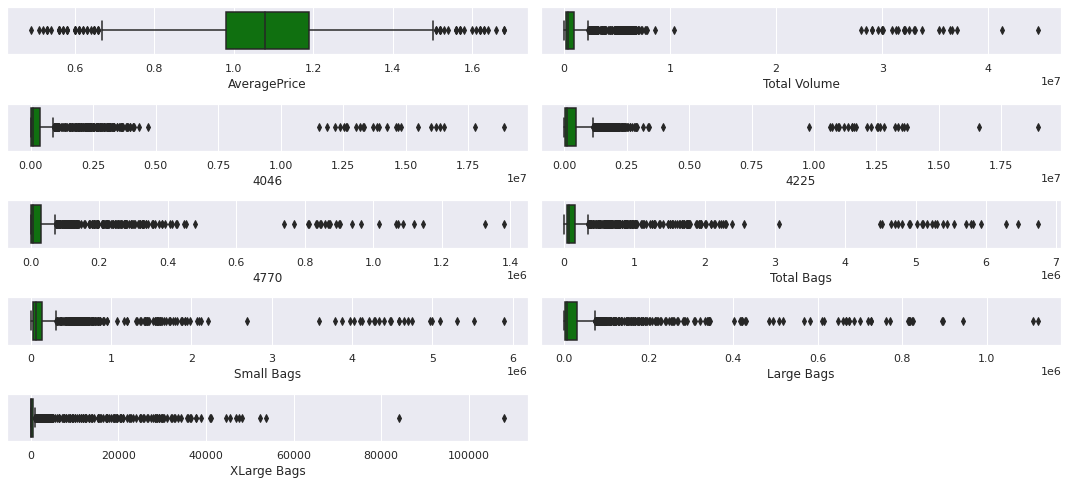

In [ ]:
columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(df[columns[i]], color='green')
  plt.tight_layout()


Observations:
1. All the variables have outliers.
2. It looks like the TotalUS is causing most of the huge Outlier issues. It definitely makes sense to remove TotalUS from the data.
3. TotalUS just looks like a summation of the values of other Regions.

Removing the TotalUS.

In [ ]:
index = np.where(df['region']=='TotalUS')[0]

In [ ]:
df_outlier = df[df['region']=='TotalUS'].copy()
df_no_out = df.drop(df.index[index])
df_no_out.shape

(1492, 15)

In [ ]:
df_no_out[df_no_out['region']=='TotalUS']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,weekofyear,month_year


In [ ]:
df_no_out.reset_index(drop=True, inplace=True)

In [ ]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
weekofyear      0.084743
dtype: float64

The skewess of data with TotalUS is pretty high.

In [ ]:
df_no_out.skew()

AveragePrice   -0.124174
Total Volume    2.298999
4046            2.639155
4225            2.072713
4770            3.114816
Total Bags      3.349434
Small Bags      3.540428
Large Bags      4.395406
XLarge Bags     6.750071
year            1.801500
weekofyear      0.074425
dtype: float64

The Skewness has decreased considerably after removing TotalUS from the dataset.

In [ ]:
df.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

In [ ]:
df_no_out.year.value_counts()

2015.0    1245
2016.0     247
Name: year, dtype: int64

All of the TotalUS related data is removed from 2015.

Checking outliers

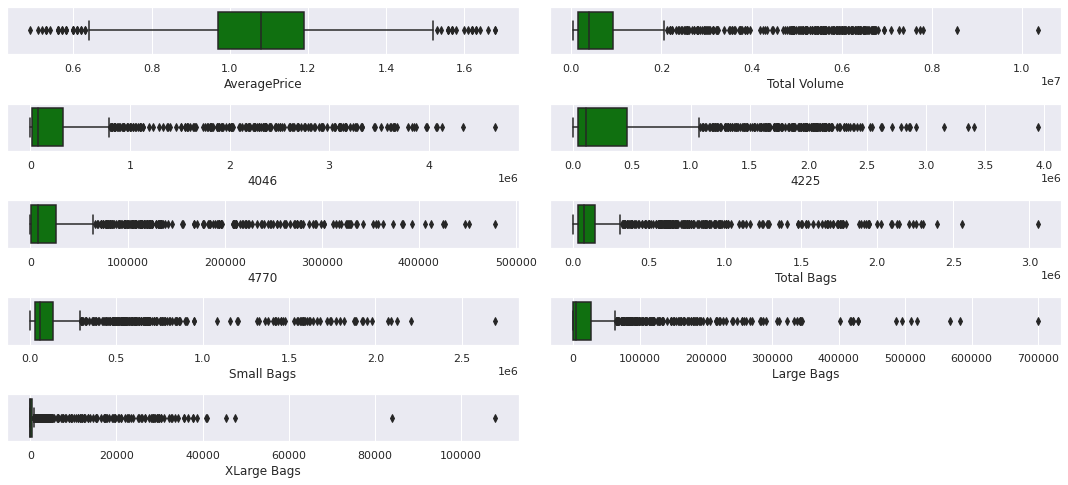

In [ ]:
columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(df_no_out[columns[i]], color='green')
  plt.tight_layout()

The huge outliers are all gone. However there are still some outliers in there.

Z Score to remove the outliers.

In [ ]:
z = np.abs(zscore(df_no_out[['AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year','weekofyear']]))
z.shape

(1492, 11)

In [ ]:
threshold = 3
df_no_out_new = df_no_out[(z<threshold).all(axis=1)]
print(df_no_out.shape)
print(df_no_out_new.shape)
print(f'With a Threshold as {threshold}, there are {round((df_no_out.shape[0] - df_no_out_new.shape[0])/df_no_out.shape[0]*100,2)}% of data as outliers')

(1492, 15)
(1331, 15)
With a Threshold as 3, there are 10.79% of data as outliers


In [ ]:
#Looking at the outliers
df_out = pd.concat([df_no_out , df_no_out_new]).drop_duplicates(keep=False)
df_out.shape

(161, 15)

Since I have already removed a considerable amount of data by removing TotalUS, I am going to leave these outliers as is. These could be natural variations of the data and if I remove it about 10% data will be gone which may not be good for the model.

In [ ]:
#After removing outliers
df_no_out_new.skew()

AveragePrice   -0.267768
Total Volume    3.696693
4046            4.066737
4225            2.836861
4770            3.738736
Total Bags      3.592746
Small Bags      3.644921
Large Bags      3.713511
XLarge Bags     5.782029
year            2.010113
weekofyear      0.086949
dtype: float64

In [ ]:
#Before removing the outliers
df_no_out.skew()

AveragePrice   -0.124174
Total Volume    2.298999
4046            2.639155
4225            2.072713
4770            3.114816
Total Bags      3.349434
Small Bags      3.540428
Large Bags      4.395406
XLarge Bags     6.750071
year            1.801500
weekofyear      0.074425
dtype: float64

The skewness is increasing if I remove the outlier. So leaving the outliers as is will be the better option.

### Data Transformation and Scaling.

Since there are some natural outliers in the data, I am going to use the RobustScaler to scale the data.

Also PowerTransform the data to correct the skewness.

Taking 2 copies of the data. 1 for Regression and the other for Classification.

For Classification

In [ ]:
#For Classification
rs = RobustScaler()
df_rs = rs.fit_transform(df_no_out.drop(['Date','type','year','region','weekofyear','month_year'], axis=1))
df_rs = pd.DataFrame(data=df_rs, columns=df_no_out.drop(['Date','type','year','region','weekofyear','month_year'], axis=1).columns.values)
df_rs.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.136364,-0.419372,-0.248593,-0.135129,-0.285442,-0.567225,-0.493981,-0.179899,0.0
1,1.227273,-0.431303,-0.249764,-0.158828,-0.285041,-0.560092,-0.486333,-0.179735,0.0
2,-0.681818,-0.350557,-0.249374,-0.003075,-0.282198,-0.572090,-0.499318,-0.179516,0.0
3,0.000000,-0.400562,-0.248285,-0.092825,-0.284480,-0.592677,-0.521799,-0.178329,0.0
4,0.909091,-0.436194,-0.248900,-0.160761,-0.284354,-0.589389,-0.518862,-0.175852,0.0


In [ ]:
pt = PowerTransformer(standardize=False)

df_pt_cls = pt.fit_transform(df_rs)
df_pt_cls = pd.DataFrame(data=df_pt_cls, columns=df_no_out.drop(['Date','type','year','region','weekofyear','month_year'], axis=1).columns.values)
df_pt_cls['year'] = df_no_out['year']
df_pt_cls['region'] = df_no_out['region']
df_pt_cls['weekofyear'] = df_no_out['weekofyear']
df_pt_cls['month'] = pd.DatetimeIndex(df_no_out['Date']).month

In [ ]:
df_pt_cls.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,weekofyear,month
0,1.172763,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015.0,Albany,52,12
1,1.269038,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015.0,Albany,51,12
2,-0.667850,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015.0,Albany,50,12
3,0.000000,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015.0,Albany,24,6
4,0.933417,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015.0,Albany,48,11


Droped the type variable since it had only one type.

Droped the Date variable after extracting week, month and year from it.

For Regression

In [ ]:
#For regression
rs_reg = RobustScaler()
df_rs_reg = rs_reg.fit_transform(df_no_out.drop(['Date','type','year','region','weekofyear','month_year','AveragePrice'], axis=1))
df_rs_reg = pd.DataFrame(data=df_rs_reg, columns=df_no_out.drop(['Date','type','year','region','weekofyear','month_year','AveragePrice'], axis=1).columns.values)
df_rs_reg.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.419372,-0.248593,-0.135129,-0.285442,-0.567225,-0.493981,-0.179899,0.0
1,-0.431303,-0.249764,-0.158828,-0.285041,-0.560092,-0.486333,-0.179735,0.0
2,-0.350557,-0.249374,-0.003075,-0.282198,-0.572090,-0.499318,-0.179516,0.0
3,-0.400562,-0.248285,-0.092825,-0.284480,-0.592677,-0.521799,-0.178329,0.0
4,-0.436194,-0.248900,-0.160761,-0.284354,-0.589389,-0.518862,-0.175852,0.0


In [ ]:
pt_reg = PowerTransformer(method = 'yeo-johnson', standardize=False,)

df_pt_reg = pt_reg.fit_transform(df_rs_reg)
df_pt_reg = pd.DataFrame(data=df_pt_reg, columns=df_no_out.drop(['Date','type','year','region','weekofyear','month_year','AveragePrice'], axis=1).columns.values)

df_pt_reg['year'] = df_no_out['year'].apply(lambda x:x)
df_pt_reg['region'] = df_no_out['region']
df_pt_reg['weekofyear'] = df_no_out['weekofyear']
df_pt_reg['month'] = pd.DatetimeIndex(df_no_out['Date']).month
df_pt_reg['AveragePrice']=df_no_out['AveragePrice']

In [ ]:
df_pt_reg.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,weekofyear,month,AveragePrice
0,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015.0,Albany,52,12,1.33
1,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015.0,Albany,51,12,1.35
2,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015.0,Albany,50,12,0.93
3,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015.0,Albany,24,6,1.08
4,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015.0,Albany,48,11,1.28


Droped the type variable since it had only one type.

Droped the Date variable after extracting week, month and year from it.

### Data Encoding

We need to encode the regions. Since regions are not ranked, I dont want to use Label encoding. Ill be using get_dummies.

In [ ]:
df_pt_reg_enc = pd.get_dummies(df_pt_reg, drop_first=True)
df_pt_reg_enc.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekofyear,month,AveragePrice,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015.0,52,12,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015.0,51,12,1.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015.0,50,12,0.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015.0,24,6,1.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015.0,48,11,1.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The model performs better when 2015 and 2016 is used instead of 0 adn 1. So loading back the 2015 and 2016 in the data

In [ ]:
df_pt_reg_enc['year'] = df_pt_reg_enc['year'].map({2015.0: 0, 2016.0 : 1})
df_pt_reg_enc.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekofyear,month,AveragePrice,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,0,52,12,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,0,51,12,1.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,0,50,12,0.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,0,24,6,1.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,0,48,11,1.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_pt_reg_enc['year'] = df_pt_reg_enc['year'].map({0: 2015, 1: 2016})
df_pt_reg_enc.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekofyear,month,AveragePrice,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015,52,12,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015,51,12,1.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015,50,12,0.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015,24,6,1.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015,48,11,1.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_pt_cls_enc = df_pt_cls.copy()
df_pt_cls_enc['year'] = df_pt_cls_enc['year'].map({2015.0: 0, 2016.0 : 1})
df_pt_cls_enc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,weekofyear,month
0,1.172763,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,0,Albany,52,12
1,1.269038,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,0,Albany,51,12
2,-0.667850,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,0,Albany,50,12
3,0.000000,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,0,Albany,24,6
4,0.933417,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,0,Albany,48,11


In [ ]:
df_pt_cls_enc['year'] = df_pt_cls_enc['year'].map({0: 2015, 1: 2016})
df_pt_cls_enc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,weekofyear,month
0,1.172763,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015,Albany,52,12
1,1.269038,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015,Albany,51,12
2,-0.667850,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015,Albany,50,12
3,0.000000,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015,Albany,24,6
4,0.933417,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015,Albany,48,11


### Correlation

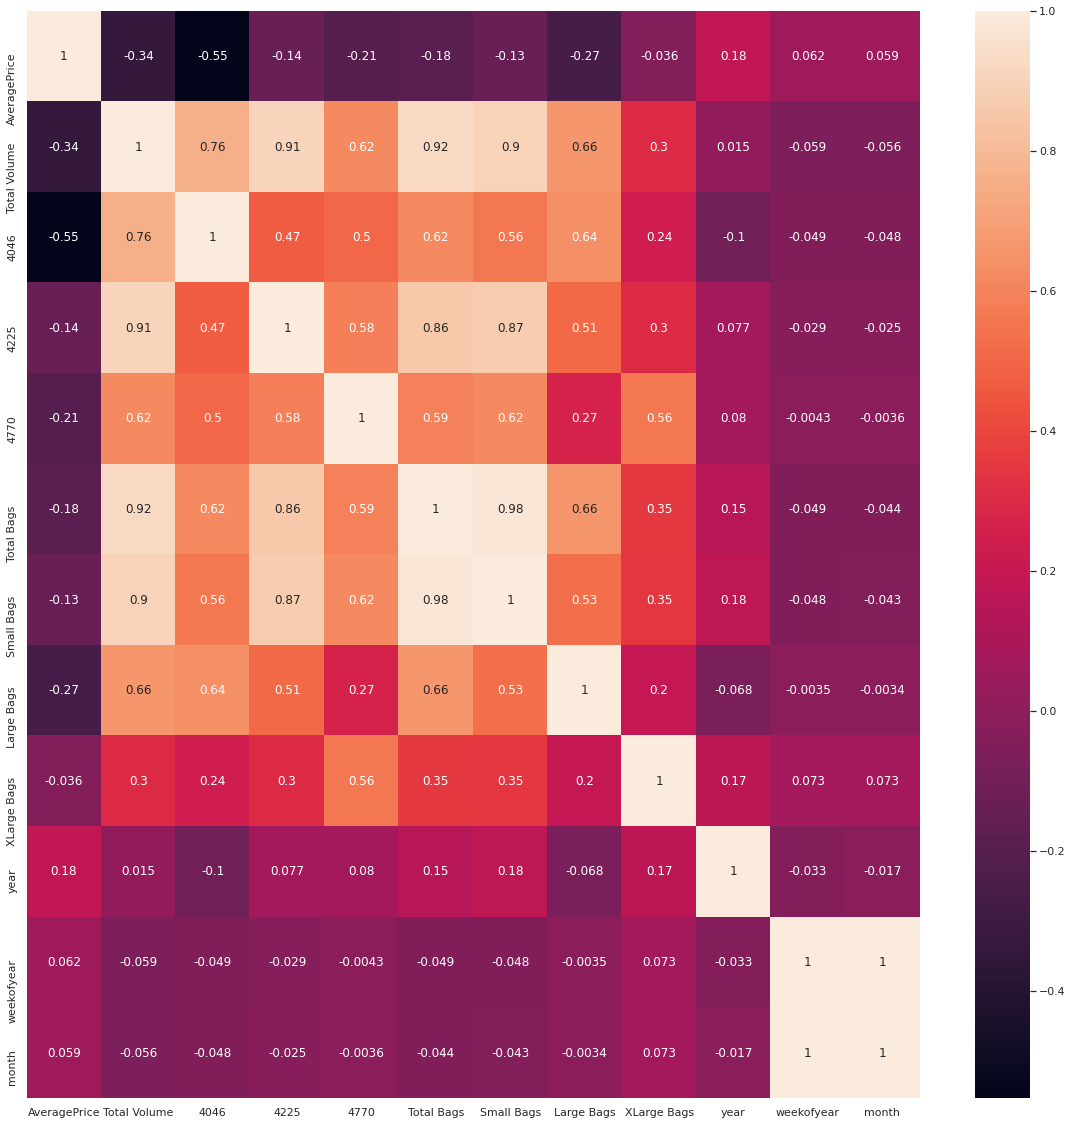

In [ ]:
corr = df_pt_cls_enc.corr()
sns.heatmap(corr, annot = True)
plt.show()

Although there are Multicollinearity in the data I am leaving the variables since the correlation to the target variable is spread across the variable.

## Regression

### Splitting features and target

In [ ]:
df_pt_reg_enc.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekofyear,month,AveragePrice,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,-0.606280,-0.322859,-0.156481,-0.378414,-0.886043,-0.746307,-0.220455,-0.0,2015,52,12,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.629609,-0.324763,-0.188600,-0.377741,-0.870487,-0.730471,-0.220214,-0.0,2015,51,12,1.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.478823,-0.324130,-0.003085,-0.372972,-0.896723,-0.757448,-0.219893,-0.0,2015,50,12,0.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.570248,-0.322359,-0.102735,-0.376797,-0.942565,-0.805172,-0.218155,-0.0,2015,24,6,1.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.639281,-0.323359,-0.191284,-0.376586,-0.935173,-0.798866,-0.214539,-0.0,2015,48,11,1.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_reg = df_pt_reg_enc.drop(['AveragePrice'], axis = 1)
y_reg = df_pt_reg_enc['AveragePrice']
x_reg.shape, y_reg.shape

((1492, 60), (1492,))

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Finding Random State

In [ ]:
best_r_state_r2 = 0
best_r_state_mse = 0
r2 = 0
r2mse= 0

mse = 100**10
mser2= 0

best_model_r2 = ''
best_model_mse = ''


models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor()]
for model in models:
  print(f"Executing for Model {model}")
  for r_state in range(0,1001):
    if r_state % 200 == 0:
      print(f"Executing r state {r_state}")
    x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size = 0.25, random_state = r_state)
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    temp_r2 = r2_score(y_test, y_preds)
    temp_mse = mean_squared_error(y_test, y_preds)

    if temp_r2 > r2:
      r2 = temp_r2
      best_r_state_r2 = r_state
      best_model_r2 = model
      r2mse = temp_mse

    if mse > temp_mse:
      mse = temp_mse
      best_r_state_mse = r_state
      best_model_mse = model
      mser2 = temp_r2

print(f"The best r2 score is {r2} with MSE: {r2mse} for the Model {best_model_r2} at Random state {best_r_state_r2}")
print(f"The least MSE is {mse} with r2 score: {mser2} for the Model {best_model_mse} at Random state {best_r_state_mse}")



In [ ]:
print(f"The best r2 score is {r2} with MSE: {r2mse} for the Model {best_model_r2} at Random state {best_r_state_r2}")
print(f"The least MSE is {mse} with r2 score: {mser2} for the Model {best_model_mse} at Random state {best_r_state_mse}")

The best r2 score is 0.8260497607786437 with MSE: 0.0067475301419776795 for the Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) at Random state 805
The least MSE is 0.0063648793565683655 with r2 score: 0.8241826603709579 for the Model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') at Random state 990


I will go for the better MSE error since the difference in MSE for Random state 990 is slightly better than MSE in 805.

Hence choosing the Random State 990.

### Splitting based on optimum random state

In [ ]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size = 0.25, random_state = 990)

### Cross Val Score

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor()]
for model in models:
  cvscore = cross_val_score(model, X = x_train_reg, y = y_train_reg, scoring = 'r2', cv = 10, n_jobs = -1,).mean()
  print(f'For Model: {model}, the Cross val score is {cvscore*100}\n')

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), the Cross val score is 74.77184335023013

For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), the Cross val score is 68.37934625058963

For Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), the Cross val score is -2.2496443902389562

For Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), the Cross val

### Hyper parameter tunning

In [ ]:
lr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(lr,param_grid = params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.2f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

r2 / variance :  0.7477184335023093
Best Parameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Residual sum of squares: 0.01


In [ ]:
rg = Ridge()
alpha = [1,0.1,0.5,0.01,0.05,0.001,0.005,0.0001,0.005,0]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

params = {'alpha':alpha, 'solver':solver,
          'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(rg, param_grid = params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.2f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

r2 / variance :  0.747828115408352
Best Parameters :  {'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'solver': 'auto'}
Residual sum of squares: 0.01


In [ ]:
dtr = DecisionTreeRegressor()

depths = np.arange(1, 10)
num_leaves = [1, 5, 10, 20, 50, 100]

params = {"criterion": ['mse','mae'],
          'splitter': ['best','random'],
          "min_samples_split": [10, 20, 40],
          "max_depth": depths,
          "min_samples_leaf": num_leaves,
          "max_leaf_nodes": [5, 20, 100],
          'max_features': ['auto','sqrt','log2']}



grid = GridSearchCV(dtr, param_grid = params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.2f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

r2 / variance :  0.689989999630889
Best Parameters :  {'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Residual sum of squares: 0.01


The Ridge model is performing slightly better than LinearRegression and better than DecisionTreeRegressor on hyperparameter Tuning.

### Ensemble Techniques

In [ ]:
models = [RandomForestRegressor(), XGBRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]
for model in models:
  cvscore = cross_val_score(model, X = x_train_reg, y = y_train_reg, scoring = 'r2', cv = 10, n_jobs = -1,).mean()
  print(f'For Model: {model}, the Cross val score is {cvscore*100}\n')

For Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), the Cross val score is 79.61858714173499

For Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        

The Ensemble techniques are giving better results.

### Hyper parameter tunning for Ensemble models

In [ ]:
rndfr = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]

# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}



grid = GridSearchCV(rndfr, param_grid = params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.3f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

r2 / variance :  0.797248268491724
Best Parameters :  {'max_depth': 110, 'max_features': 'sqrt', 'n_estimators': 2000}
Residual sum of squares: 0.005


In [ ]:
xgbr = XGBRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
#Learning rate
learning_rate = [0.05,0.01,0.5,0.1,1]

# Create the random grid
params = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth}



grid = GridSearchCV(xgbr, param_grid = params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.3f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

[18:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 / variance :  0.8014345239559416
Best Parameters :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1050}
Residual sum of squares: 0.005


In [ ]:
gbr = GradientBoostingRegressor()



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 3)]
#Learning rate
learning_rate = [0.05,0.01,0.5,0.1,1]
#booster
criterion = ['friedman_mse', 'mse']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
#maximum features used
max_features  = ['auto', 'log2']

# Create the random grid
params = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'criterion': criterion,
               'max_features':max_features,
               'max_depth':max_depth}



grid = GridSearchCV(gbr, param_grid = params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_reg, y_train_reg)
print("r2 / variance : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Residual sum of squares: %.3f"% mean_squared_error(y_test_reg,grid.predict(x_test_reg)))

r2 / variance :  0.8296782864873216
Best Parameters :  {'criterion': 'mse', 'learning_rate': 0.01, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 2000}
Residual sum of squares: 0.004


 ### Final Model - Regression

In [ ]:
tunned_models = [Ridge(alpha = 0.0001, copy_X = True, fit_intercept = True, normalize = True, solver = 'auto'), GradientBoostingRegressor(criterion = 'mse', learning_rate = 0.01, max_depth = 10, max_features = 'log2', n_estimators = 2000)]
for model in tunned_models:
  cvscore = cross_val_score(model, X = x_train_reg, y = y_train_reg, scoring = 'r2', cv = 10, n_jobs = -1,).mean()
   
  model.fit(x_train_reg, y_train_reg)
  y_trainpreds = model.predict(x_train_reg)
  y_preds = model.predict(x_test_reg)

  print(f"Tuned {model.__class__.__name__} model:")
  print(f'The Cross val score is {cvscore*100}\n')
  print(f"Train R2 score: {r2_score(y_train_reg, y_trainpreds)}")
  print(f"Train Mean Squared Error: {mean_squared_error(y_train_reg, y_trainpreds)}")
  print(f"Test R2 score: {r2_score(y_test_reg, y_preds)}")
  print(f"Test Mean Squared Error: {mean_squared_error(y_test_reg, y_preds)}")
  print("="*100)


Tuned Ridge model:
The Cross val score is 74.7828115408352

Train R2 score: 0.7749397146651944
Train Mean Squared Error: 0.008070130804857545
Test R2 score: 0.7871024326029095
Test Mean Squared Error: 0.0077072451138689045
Tuned GradientBoostingRegressor model:
The Cross val score is 83.50393098180042

Train R2 score: 0.9998917110188289
Train Mean Squared Error: 3.8829873581466705e-06
Test R2 score: 0.8824617407030069
Test Mean Squared Error: 0.004255079969841808


Although GradientBoostingRegressor algorithm gave a Train score of 0.999(hint of overfitting), it is also giving a Cross validation score of 83.56% which is much better than the Ridge model. This denotes that it is capable of giving good results with different dataset.
It is also giving a good result on the testset we split using the random state.

The GradientBoostingRegressor model for this dataset is showing low bias and low variance.

Hence I am choosing the GradientBoostingRegressor model as the final model.

In [ ]:
gbreg = GradientBoostingRegressor(criterion = 'mse', learning_rate = 0.01, max_depth = 10, max_features = 'log2', n_estimators = 2000)

gbreg.fit(x_train_reg, y_train_reg)
y_preds_gbreg = gbreg.predict(x_test_reg)

print("Tuned GradientBoost Regressor model:")
print(f"Test R2 score: {r2_score(y_test_reg, y_preds_gbreg)}")
print(f"Test Mean Squared Error: {mean_squared_error(y_test_reg, y_preds_gbreg)}")

Tuned GradientBoost Regressor model:
Test R2 score: 0.8818473810557574
Test Mean Squared Error: 0.004277320808228609


### Saving Model and predictions - Regression

In [ ]:
#joblib.dump(gbreg,'./models/avacado_reg_model.obj')   #Save in local system
joblib.dump(gbreg,'/content/avacado_reg_model.obj')   #save in colab

In [ ]:
y_predictions = pd.DataFrame(y_preds_gbreg, columns=['AveragePricePredictions'], index = x_test_reg.index)
y_predictions.head()

,AveragePricePredictions
921,1.116224
1451,1.020000
120,1.198490
628,1.041255
790,0.576389


In [ ]:
reg_test_predictions = pd.concat([x_test_reg, y_predictions],axis=1)
#reg_test_predictions.to_csv('./data/AvacadoAvgPricePredictions.csv', sep =',')  # save in local system
reg_test_predictions.to_csv('/content/AvacadoAvgPricePredictions.csv', sep =',')  # save in colab

## Classification

We are dealing with a Multi-class Classification problem.

### Splitting features and target

In [ ]:
x_cls = df_pt_cls_enc.drop(['region'], axis = 1)
y_cls = df_pt_cls_enc['region']
x_cls.shape, y_cls.shape

((1492, 12), (1492,))

### Finding Random State

In [ ]:
best_r_state = 0
best_model =''
accu = 0

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
for model in models:
  print(f"Executing for Model {model}")
  for r_state in range(400,601):
    if r_state % 20 == 0:
      print(f"Executing r state {r_state}")
    x_train, x_test, y_train, y_test = train_test_split(x_cls, y_cls, test_size = 0.25, stratify = y_cls ,random_state = r_state)
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    temp_accu = f1_score(y_test, y_preds,average = 'micro')

    if temp_accu > accu:
      accu = temp_accu
      best_r_state = r_state
      best_model = model

print(f"The best F1 score score is {accu} for the Model {best_model} at Random state {best_r_state}")




In [ ]:
print(f"The best F1 score is {accu} for the Model {best_model} at Random state {best_r_state}")


The best F1 score is 0.9249329758713136 for the Model GaussianNB(priors=None, var_smoothing=1e-09) at Random state 458


After trying different range combinations, 0.925 is the highest score obtained with Random state 458.

Splitting based on optimum random state

In [ ]:
x_train_cls, x_test_cls, y_train_cls, y_test_cls = train_test_split(x_cls, y_cls, test_size = 0.25, stratify = y_cls, random_state = 458)

### Cross Val Score

In [ ]:
models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
for model in models:
  cvscore = cross_val_score(model, X = x_train_cls, y = y_train_cls, scoring = 'f1_micro', cv = 10, n_jobs = -1,).mean()
  print(f'For Model: {model}, the Cross val score is {cvscore*100}\n')

For Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), the Cross val score is 9.202863577863578

For Model: GaussianNB(priors=None, var_smoothing=1e-09), the Cross val score is 87.9351673101673

For Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), the Cross val score is 87.13159588159589

For Model: SVC(C=1.0, break_ties=False, c

GaussianNB and DecisionTree are performing fairly well than the others. We will be further tunning these models.

### Ensemble Techniques

In [ ]:
models = [RandomForestClassifier(), XGBClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
for model in models:
  cvscore = cross_val_score(model, X = x_train_cls, y = y_train_cls, scoring = 'f1_micro', cv = 10, n_jobs = -1,).mean()
  print(f'For Model: {model}, the Cross val score is {cvscore*100}\n')

For Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), the Cross val score is 96.60472972972973

For Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, sc

The Ensemble techniques are giving better results.

### Hyper Tunning

In [ ]:
gnb = GaussianNB()
params = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(gnb,param_grid = params, cv=10, scoring='f1_micro', n_jobs=-1)
grid.fit(x_train_cls, y_train_cls)
print("F1 score : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Test F1 score: %.3f"% f1_score(y_test_cls,grid.predict(x_test_cls), average='micro'))

F1 score :  0.8883043758043758
Best Parameters :  {'var_smoothing': 1.232846739442066e-06}
Test F1 score: 0.912


In [ ]:
dtc = DecisionTreeClassifier()

depths = np.arange(5, 10)
num_leaves = [1, 5, 10, 20, 50, 100]

params = {"criterion": ['gini','entropy'],
          'splitter': ['best'],
          "min_samples_split": [10, 20],
          "max_depth": depths,
          "min_samples_leaf": num_leaves,
          "max_leaf_nodes": [5, 20, 100],
          'max_features': ['auto','log2']}



grid = GridSearchCV(dtc, param_grid = params, cv=10, scoring='f1_micro', n_jobs=-1)
grid.fit(x_train_cls, y_train_cls)
print("F1 score : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)
print("Test F1 score : %.3f"% f1_score(y_test_cls,grid.predict(x_test_cls), average='micro'))

F1 score :  0.8015765765765765
Best Parameters :  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Test F1 score : 0.839


GaussianNB is performing better.

### Ensemble Techniques

In [ ]:
rndfrc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1500, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 3)]
#Criterion
criterion = ['gini','entropy']


# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,'criterion' : criterion}



rnd_grid = GridSearchCV(rndfrc, param_grid = params, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
rnd_grid.fit(x_train_cls, y_train_cls)

In [ ]:
print("RandomForest:")
print("F1 Score : ", rnd_grid.best_score_)
print("Best Parameters : ", rnd_grid.best_params_)
print("Test F1 score: %.3f"% f1_score(y_test_cls,rnd_grid.predict(x_test_cls), average='micro'))

RandomForest:
F1 Score :  0.9651505445227417
Best Parameters :  {'criterion': 'entropy', 'max_depth': 150, 'max_features': 'auto', 'n_estimators': 1000}
Test F1 score: 0.976


In [ ]:
xgbc = XGBClassifier(objective='multi:softmax')

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)]
#Learning rate
learning_rate = [0.05,0.5,0.1]
#booster
booster = ['gbtree']

# Create the random grid
params = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'booster': booster,
               'max_depth': max_depth}



xgb_grid = GridSearchCV(xgbc, param_grid = params, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
xgb_grid.fit(x_train_cls, y_train_cls)

In [ ]:
print("XGB")
print("F1 score : ", xgb_grid.best_score_)
print("Best Parameters : ", xgb_grid.best_params_)
print("Test F1 score: %.2f"% f1_score(y_test_cls,xgb_grid.predict(x_test_cls), average='micro'))

XGB
F1 score :  0.9186699231262011
Best Parameters :  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1050}
Test F1 score: 0.91


Random Forest is performing better in Ensemble models

### Final Model - Classification

In [ ]:
tunned_models = [GaussianNB(var_smoothing = 1.232846739442066e-06), RandomForestClassifier(criterion = 'entropy', max_depth = 150, max_features = 'auto', n_estimators = 1000)]

for model in tunned_models:
  cvscore = cross_val_score(model, X = x_train_cls, y = y_train_cls, scoring = 'f1_micro', cv = 10, n_jobs = -1).mean()
   
  model.fit(x_train_cls, y_train_cls)
  y_trainpreds = model.predict(x_train_cls)
  y_preds = model.predict(x_test_cls)

  print(f"Tuned {model.__class__.__name__} model:")
  print(f'The Cross val score is {cvscore*100}\n')
  print(f"Train F1 score: {f1_score(y_train_cls, y_trainpreds,average='micro')}")
  print(f"Train Classification Report:\n {classification_report(y_train_cls, y_trainpreds)}")
  
  print(f"Test F1 score: {f1_score(y_test_cls, y_preds,average='micro')}")
  print(f"Test Classification Report:\n {classification_report(y_test_cls, y_preds)}")
  
  print("="*100)


Tuned GaussianNB model:
The Cross val score is 88.83043758043758

Train F1 score: 0.9177837354781054
Train Classification Report:
                      precision    recall  f1-score   support

             Albany       0.96      0.96      0.96        50
            Atlanta       1.00      0.68      0.81        41
BaltimoreWashington       1.00      0.98      0.99        49
              Boise       0.97      0.69      0.81        49
             Boston       1.00      0.77      0.87        47
   BuffaloRochester       0.97      0.95      0.96        38
         California       1.00      1.00      1.00        57
          Charlotte       1.00      0.61      0.76        23
            Chicago       1.00      1.00      1.00        17
           Columbus       1.00      1.00      1.00        35
      DallasFtWorth       1.00      1.00      1.00        13
             Denver       1.00      1.00      1.00        18
            Detroit       1.00      1.00      1.00        30
        GrandR

The Random Forest model is doing a very good job after grid search cv and in cross validation. Hence picking Random forest classifier as our final model.

In [ ]:
rfcls = RandomForestClassifier(criterion = 'entropy', max_depth = 150, max_features = 'auto', n_estimators = 1000)

rfcls.fit(x_train_cls, y_train_cls)
y_preds_rfcls = rfcls.predict(x_test_cls)

print("Tuned RandomForestClassifier model:")
print(f"Test F1 score: {f1_score(y_test_cls, y_preds,average='micro')}")
print(f"Test Confusion Matrix: \n{confusion_matrix(y_test_cls, y_preds)}")
print(f"Test Classification Report: \n{classification_report(y_test_cls, y_preds)}")

Tuned RandomForestClassifier model:
Test F1 score: 0.9758713136729221
Test Confusion Matrix: 
[[17  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  6]]
Test Classification Report: 
                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        17
            Atlanta       0.87      1.00      0.93        13
BaltimoreWashington       1.00      1.00      1.00        16
              Boise       1.00      1.00      1.00        16
             Boston       1.00      1.00      1.00        15
   BuffaloRochester       1.00      1.00      1.00        13
         California       1.00      1.00      1.00        19
          Charlotte       0.89      1.00      0.94         8
            Chicago       1.00      1.00      1.00         6
           Columbus       0.92      1.00      0.96        12
      DallasFtWorth       1.00      0.75      0.8

Orlando is giving a slightly lesser score than the other regions. We need more data to train the model.

### Saving Model and predictions - classification

In [ ]:
#joblib.dump(rfcls,'./models/avacado_cls_model.obj')   #save in local file
joblib.dump(rfcls,'/content/avacado_cls_model.obj')  #save in colab

In [ ]:
y_predictions_cls = pd.DataFrame(y_preds_rfcls, columns=['RegionPredictions'], index = x_test_cls.index)
y_predictions_cls.head()

,RegionPredictions
951,SanDiego
1127,StLouis
95,BaltimoreWashington
1336,Boise
205,California


In [ ]:
cls_test_predictions = pd.concat([x_test_cls, y_predictions_cls],axis=1)
#cls_test_predictions.to_csv('./data/AvacadoRegionPredictions.csv', sep =',')   #save in local file
cls_test_predictions.to_csv('/content/AvacadoRegionPredictions.csv', sep =',')  #save in colab

# Experimenting with time series Analysis and modelling

Forcasting future Avacado price using ARIMA and SARIMAX

In [ ]:
time_df=data.loc[:1516,['Date','region','AveragePrice']].copy()
time_df.head()

,Date,region,AveragePrice
0,27-12-2015,Albany,1.33
1,20-12-2015,Albany,1.35
2,13-12-2015,Albany,0.93
3,06-12-2015,Albany,1.08
4,29-11-2015,Albany,1.28


Picking the Date region and the AveragePrice

In [ ]:
time_df.shape

(1517, 3)

In [ ]:
time_df['Date'] = pd.to_datetime(time_df['Date'])

In [ ]:
time_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   region        1517 non-null   object        
 2   AveragePrice  1517 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.7+ KB


In [ ]:
time_df['Date'].value_counts()

2015-05-04    34
2015-12-04    34
2015-04-19    33
2015-04-26    32
2015-03-22    32
              ..
2016-04-09     3
2016-07-31     3
2016-10-07     3
2016-03-07     3
2016-11-09     2
Name: Date, Length: 104, dtype: int64

There are multiple occurances for each date.

Setting the date as index

In [ ]:
time_df.set_index('Date', inplace=True)

In [ ]:
time_df.head()

,region,AveragePrice
Date,,
2015-12-27,Albany,1.33
2015-12-20,Albany,1.35
2015-12-13,Albany,0.93
2015-06-12,Albany,1.08
2015-11-29,Albany,1.28


In [ ]:
time_df.describe()

,AveragePrice
count,1517.000000
mean,1.074990
std,0.188891
min,0.490000
25%,0.980000
50%,1.080000
75%,1.190000
max,1.680000


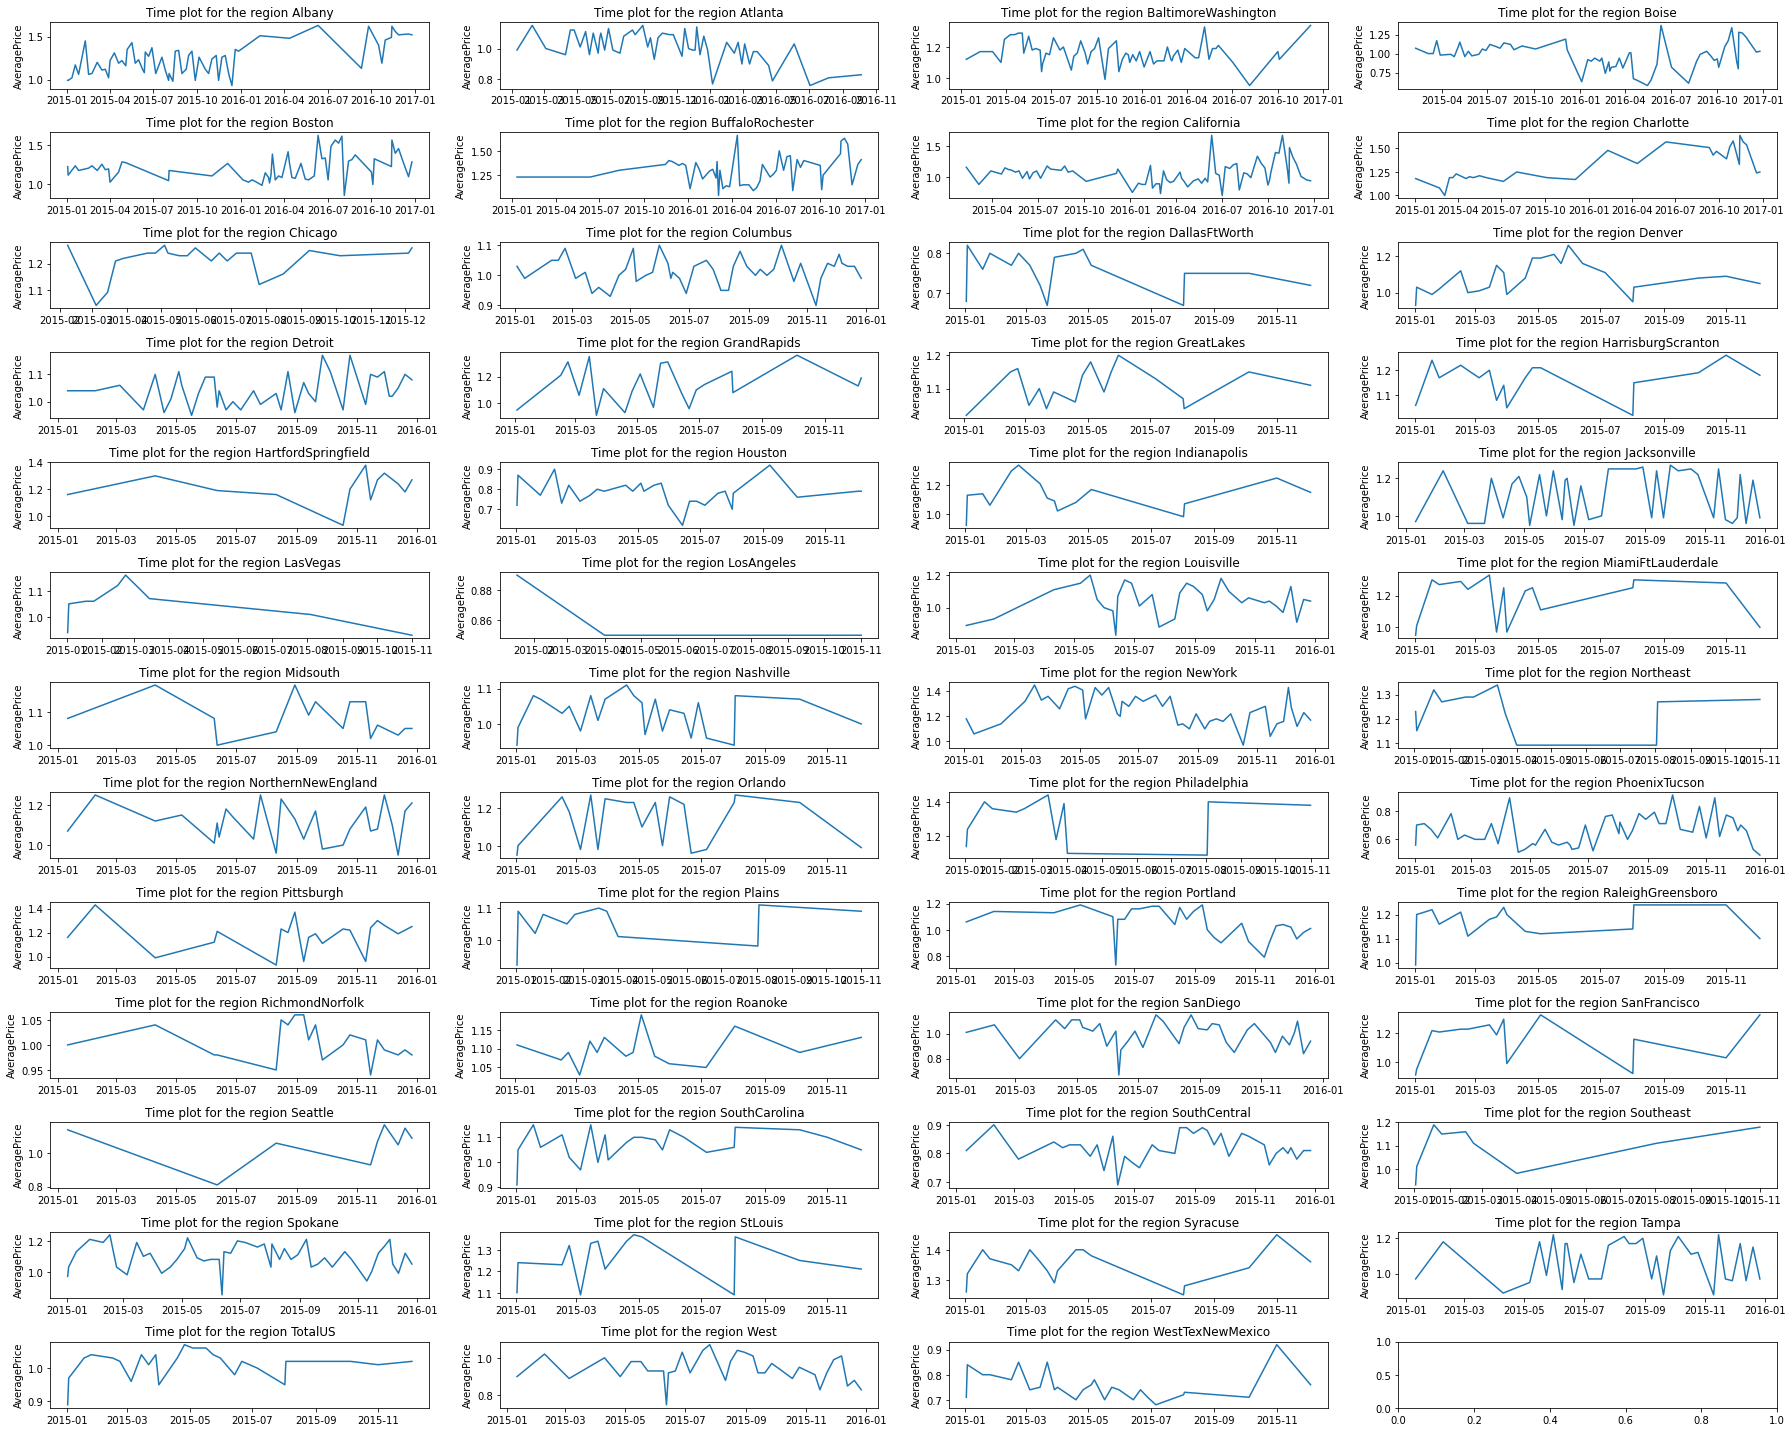

In [ ]:
f,ax = plt.subplots(13,4,figsize=(25,20))
f.tight_layout()
i,j = 0,0

for region in time_df['region'].unique():
  g = sns.lineplot(x=time_df[time_df['region']== region]['AveragePrice'].index,y=time_df[time_df['region']== region]['AveragePrice'], ax= ax[i,j])
  g.set(xlabel=None)
  g.set_xtickslabel=None
  ax[i,j].set_title(f'Time plot for the region {region}')
  plt.tight_layout()

  j+=1 
  if j%4 == 0:
    i+=1
    j=0

Observations:
1. There are AveragePrices missing the regions for certain dates. And 2016's data not sufficient.

## Testing Stationarity

In [ ]:
time_df.isnull().sum()

region          0
AveragePrice    0
dtype: int64

In [ ]:
regions = {}
for region in time_df['region'].unique():
  print(f"For region {region}")
  try:
    results = adfuller(time_df[time_df['region'] == region]['AveragePrice'])
    labels = ['ADF TestStats','p_value','#Lags Used','# Observations']
    for value, label in zip(results,labels):
      print(f"{label} : {value}")
    if results[1] <= 0.05:
      print("Hypothesis result: Strong evidence against the null hypothesis that Data is non-stationary.")
    else:
      print("Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!")
      regions[region] = results



  except:
    print("Sample size is small!!")
  finally:
    print("="*50)

For region Albany
ADF TestStats : -2.343994489295201
p_value : 0.15817104727584286
#Lags Used : 7
# Observations : 59
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!
For region Atlanta
ADF TestStats : -2.676835040659495
p_value : 0.07813331237564297
#Lags Used : 1
# Observations : 52
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!
For region BaltimoreWashington
ADF TestStats : -2.9395692730091905
p_value : 0.040936337895338924
#Lags Used : 3
# Observations : 61
Hypothesis result: Strong evidence against the null hypothesis that Data is non-stationary.
For region Boise
ADF TestStats : -2.4752006289746378
p_value : 0.12162545947646852
#Lags Used : 0
# Observations : 64
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicati

Making a new copy of the data

In [ ]:
ts=pd.DataFrame(data=None, columns=['Date'])
ts['Date']=time_df.drop(['region','AveragePrice'],axis=1).index.unique()
ts

,Date
0,2015-12-27
1,2015-12-20
2,2015-12-13
3,2015-06-12
4,2015-11-29
...,...
99,2016-07-17
100,2016-10-07
101,2016-03-07
102,2016-06-26


In [ ]:
def extract_values(x):
  """
  This method helps in extracting the AveragePrice of each region based on the date
  """
  try:
    return time_df[time_df['region']==region].loc[str(x),'AveragePrice'].values[0]
  except:
    return 0


Separating the AveragePrices of each region as separate columns

In [ ]:
for region in time_df['region'].unique():
  ts['AveragePrice_'+region] = ts['Date'].apply(extract_values)
ts

,Date,AveragePrice_Albany,AveragePrice_Atlanta,AveragePrice_BaltimoreWashington,AveragePrice_Boise,AveragePrice_Boston,AveragePrice_BuffaloRochester,AveragePrice_California,AveragePrice_Charlotte,AveragePrice_Chicago,AveragePrice_Columbus,AveragePrice_DallasFtWorth,AveragePrice_Denver,AveragePrice_Detroit,AveragePrice_GrandRapids,AveragePrice_GreatLakes,AveragePrice_HarrisburgScranton,AveragePrice_HartfordSpringfield,AveragePrice_Houston,AveragePrice_Indianapolis,AveragePrice_Jacksonville,AveragePrice_LasVegas,AveragePrice_LosAngeles,AveragePrice_Louisville,AveragePrice_MiamiFtLauderdale,AveragePrice_Midsouth,AveragePrice_Nashville,AveragePrice_NewYork,AveragePrice_Northeast,AveragePrice_NorthernNewEngland,AveragePrice_Orlando,AveragePrice_Philadelphia,AveragePrice_PhoenixTucson,AveragePrice_Pittsburgh,AveragePrice_Plains,AveragePrice_Portland,AveragePrice_RaleighGreensboro,AveragePrice_RichmondNorfolk,AveragePrice_Roanoke,AveragePrice_SanDiego,AveragePrice_SanFrancisco,AveragePrice_Seattle,AveragePrice_SouthCarolina,AveragePrice_SouthCentral,AveragePrice_Southeast,AveragePrice_Spokane,AveragePrice_StLouis,AveragePrice_Syracuse,AveragePrice_Tampa,AveragePrice_TotalUS,AveragePrice_West,AveragePrice_WestTexNewMexico
0,2015-12-27,1.33,0.99,1.17,0.0,0.00,1.35,0.00,0.0,0.0,0.99,0.0,0.0,1.08,0.0,0.0,0.0,1.27,0.0,0.0,0.99,0.0,0.0,1.04,0.0,1.05,0.0,1.17,0.0,1.21,0.0,0.0,0.49,1.25,0.0,1.01,0.0,0.98,0.0,0.00,0.0,1.09,0.0,0.81,0.0,1.05,0.0,0.0,0.97,0.0,0.83,0.0
1,2015-12-20,1.35,1.08,1.11,0.0,0.00,1.37,0.00,0.0,0.0,1.03,0.0,0.0,1.10,0.0,0.0,0.0,1.18,0.0,0.0,1.19,0.0,0.0,1.05,0.0,1.05,0.0,1.23,0.0,1.17,0.0,0.0,0.53,1.22,0.0,0.98,0.0,0.99,0.0,0.94,0.0,1.15,0.0,0.81,0.0,1.12,0.0,0.0,1.15,0.0,0.88,0.0
2,2015-12-13,0.93,0.96,1.15,0.0,0.00,1.35,0.00,0.0,0.0,1.03,0.0,0.0,1.05,0.0,0.0,0.0,1.24,0.0,0.0,0.96,0.0,0.0,0.91,0.0,1.03,0.0,1.12,0.0,0.95,0.0,0.0,0.66,1.19,0.0,0.93,0.0,0.98,0.0,0.84,0.0,1.05,0.0,0.78,0.0,0.99,0.0,0.0,0.96,0.0,0.85,0.0
3,2015-06-12,1.08,1.07,1.04,0.0,0.00,1.23,0.00,0.0,0.0,0.99,0.0,0.0,0.98,0.0,0.0,0.0,1.19,0.0,0.0,1.19,0.0,0.0,0.83,0.0,1.00,0.0,1.20,0.0,1.11,0.0,0.0,0.56,1.21,0.0,0.73,0.0,0.98,0.0,0.67,0.0,0.81,0.0,0.76,0.0,0.85,0.0,0.0,1.17,0.0,0.75,0.0
4,2015-11-29,1.28,0.99,1.16,0.0,0.00,1.39,0.00,0.0,0.0,1.03,0.0,0.0,1.11,0.0,0.0,0.0,1.32,0.0,0.0,0.96,0.0,0.0,0.97,0.0,1.05,0.0,1.16,0.0,1.25,0.0,0.0,0.75,1.26,0.0,1.04,0.0,0.99,0.0,0.91,0.0,1.17,0.0,0.82,0.0,1.17,0.0,0.0,0.96,0.0,0.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016-07-17,0.00,0.00,0.00,0.0,1.56,1.30,1.14,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
100,2016-10-07,0.00,0.00,0.00,0.0,1.32,1.25,1.08,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
101,2016-03-07,0.00,0.00,0.00,0.0,1.38,1.30,1.10,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
102,2016-06-26,0.00,0.00,0.00,0.0,1.33,1.26,1.03,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              104 non-null    datetime64[ns]
 1   AveragePrice_Albany               104 non-null    float64       
 2   AveragePrice_Atlanta              104 non-null    float64       
 3   AveragePrice_BaltimoreWashington  104 non-null    float64       
 4   AveragePrice_Boise                104 non-null    float64       
 5   AveragePrice_Boston               104 non-null    float64       
 6   AveragePrice_BuffaloRochester     104 non-null    float64       
 7   AveragePrice_California           104 non-null    float64       
 8   AveragePrice_Charlotte            104 non-null    float64       
 9   AveragePrice_Chicago              104 non-null    float64       
 10  AveragePrice_Columbus             104 non-null    

Sorting the date and setting the date as the index

In [ ]:
ts = ts.sort_values(by='Date')
ts.set_index('Date', inplace=True)

Making another copy of the data

In [ ]:
tss = ts.copy()
tss

,AveragePrice_Albany,AveragePrice_Atlanta,AveragePrice_BaltimoreWashington,AveragePrice_Boise,AveragePrice_Boston,AveragePrice_BuffaloRochester,AveragePrice_California,AveragePrice_Charlotte,AveragePrice_Chicago,AveragePrice_Columbus,AveragePrice_DallasFtWorth,AveragePrice_Denver,AveragePrice_Detroit,AveragePrice_GrandRapids,AveragePrice_GreatLakes,AveragePrice_HarrisburgScranton,AveragePrice_HartfordSpringfield,AveragePrice_Houston,AveragePrice_Indianapolis,AveragePrice_Jacksonville,AveragePrice_LasVegas,AveragePrice_LosAngeles,AveragePrice_Louisville,AveragePrice_MiamiFtLauderdale,AveragePrice_Midsouth,AveragePrice_Nashville,AveragePrice_NewYork,AveragePrice_Northeast,AveragePrice_NorthernNewEngland,AveragePrice_Orlando,AveragePrice_Philadelphia,AveragePrice_PhoenixTucson,AveragePrice_Pittsburgh,AveragePrice_Plains,AveragePrice_Portland,AveragePrice_RaleighGreensboro,AveragePrice_RichmondNorfolk,AveragePrice_Roanoke,AveragePrice_SanDiego,AveragePrice_SanFrancisco,AveragePrice_Seattle,AveragePrice_SouthCarolina,AveragePrice_SouthCentral,AveragePrice_Southeast,AveragePrice_Spokane,AveragePrice_StLouis,AveragePrice_Syracuse,AveragePrice_Tampa,AveragePrice_TotalUS,AveragePrice_West,AveragePrice_WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.99,0.00,0.00,0.00,1.22,0.00,0.00,0.00,0.0,0.00,0.68,0.93,0.00,0.00,0.00,1.06,0.00,0.72,0.92,0.00,0.94,0.00,0.00,0.95,0.00,0.94,0.00,1.23,0.00,0.95,1.14,0.56,0.00,0.92,0.00,0.99,0.0,0.00,0.00,0.91,0.00,0.91,0.00,0.93,0.97,1.10,1.26,0.00,0.89,0.0,0.71
2015-01-03,0.99,0.00,0.00,0.00,1.11,0.00,0.00,1.18,0.0,1.03,0.82,1.03,0.00,0.95,1.02,1.07,0.00,0.87,1.13,0.00,1.05,0.00,0.00,1.01,0.00,0.99,1.18,1.15,0.00,1.00,1.24,0.70,0.00,1.09,0.00,1.20,0.0,1.11,0.00,0.95,0.00,1.05,0.00,1.01,1.03,1.24,1.32,0.00,0.97,0.0,0.84
2015-01-11,1.02,0.99,1.12,0.00,0.00,1.23,0.00,0.00,0.0,0.99,0.00,0.00,1.04,0.00,0.00,0.00,1.16,0.00,0.00,0.97,0.00,0.00,0.89,0.00,1.08,0.00,1.06,0.00,1.07,0.00,0.00,0.71,1.16,0.00,1.06,0.00,1.0,0.00,1.01,0.00,1.14,0.00,0.81,0.00,1.13,0.00,0.00,0.97,0.00,0.9,0.00
2015-01-18,1.17,0.00,0.00,0.00,1.23,0.00,0.00,0.00,0.0,0.00,0.76,0.99,0.00,0.00,0.00,1.24,0.00,0.00,1.14,0.00,1.06,0.89,0.00,1.30,0.00,1.08,0.00,1.32,0.00,0.00,1.40,0.67,0.00,1.02,0.00,1.22,0.0,0.00,0.00,1.22,0.00,1.15,0.00,1.19,0.00,0.00,1.40,0.00,1.03,0.0,0.80
2015-01-25,1.06,0.00,0.00,0.00,1.17,0.00,0.00,0.00,0.0,0.00,0.80,1.02,0.00,0.00,0.00,1.17,0.00,0.77,1.06,0.00,1.06,0.00,0.00,1.27,0.00,1.07,0.00,1.27,0.00,0.00,1.36,0.61,0.00,1.08,0.00,1.16,0.0,0.00,0.00,1.21,0.00,1.06,0.00,1.15,1.21,0.00,1.37,0.00,1.04,0.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-20,1.56,0.00,0.00,1.27,1.39,1.63,1.32,1.57,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2016-11-27,1.52,0.00,0.00,1.22,1.45,1.57,1.21,1.54,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2016-12-06,0.00,0.00,1.34,0.00,1.29,1.15,1.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


Since the data is a weekly average I am shiting by 4 fpr seasonal difference

In [ ]:
for col in ts.columns:
  tss[col+"_First_Difference"] = ts[col] - ts[col].shift(1)
  tss[col+"_Seasonal_Difference"] = ts[col] - ts[col].shift(4)


In [ ]:
tss.head(6)

,AveragePrice_Albany,AveragePrice_Atlanta,AveragePrice_BaltimoreWashington,AveragePrice_Boise,AveragePrice_Boston,AveragePrice_BuffaloRochester,AveragePrice_California,AveragePrice_Charlotte,AveragePrice_Chicago,AveragePrice_Columbus,AveragePrice_DallasFtWorth,AveragePrice_Denver,AveragePrice_Detroit,AveragePrice_GrandRapids,AveragePrice_GreatLakes,AveragePrice_HarrisburgScranton,AveragePrice_HartfordSpringfield,AveragePrice_Houston,AveragePrice_Indianapolis,AveragePrice_Jacksonville,AveragePrice_LasVegas,AveragePrice_LosAngeles,AveragePrice_Louisville,AveragePrice_MiamiFtLauderdale,AveragePrice_Midsouth,AveragePrice_Nashville,AveragePrice_NewYork,AveragePrice_Northeast,AveragePrice_NorthernNewEngland,AveragePrice_Orlando,AveragePrice_Philadelphia,AveragePrice_PhoenixTucson,AveragePrice_Pittsburgh,AveragePrice_Plains,AveragePrice_Portland,AveragePrice_RaleighGreensboro,AveragePrice_RichmondNorfolk,AveragePrice_Roanoke,AveragePrice_SanDiego,AveragePrice_SanFrancisco,...,AveragePrice_PhoenixTucson_First_Difference,AveragePrice_PhoenixTucson_Seasonal_Difference,AveragePrice_Pittsburgh_First_Difference,AveragePrice_Pittsburgh_Seasonal_Difference,AveragePrice_Plains_First_Difference,AveragePrice_Plains_Seasonal_Difference,AveragePrice_Portland_First_Difference,AveragePrice_Portland_Seasonal_Difference,AveragePrice_RaleighGreensboro_First_Difference,AveragePrice_RaleighGreensboro_Seasonal_Difference,AveragePrice_RichmondNorfolk_First_Difference,AveragePrice_RichmondNorfolk_Seasonal_Difference,AveragePrice_Roanoke_First_Difference,AveragePrice_Roanoke_Seasonal_Difference,AveragePrice_SanDiego_First_Difference,AveragePrice_SanDiego_Seasonal_Difference,AveragePrice_SanFrancisco_First_Difference,AveragePrice_SanFrancisco_Seasonal_Difference,AveragePrice_Seattle_First_Difference,AveragePrice_Seattle_Seasonal_Difference,AveragePrice_SouthCarolina_First_Difference,AveragePrice_SouthCarolina_Seasonal_Difference,AveragePrice_SouthCentral_First_Difference,AveragePrice_SouthCentral_Seasonal_Difference,AveragePrice_Southeast_First_Difference,AveragePrice_Southeast_Seasonal_Difference,AveragePrice_Spokane_First_Difference,AveragePrice_Spokane_Seasonal_Difference,AveragePrice_StLouis_First_Difference,AveragePrice_StLouis_Seasonal_Difference,AveragePrice_Syracuse_First_Difference,AveragePrice_Syracuse_Seasonal_Difference,AveragePrice_Tampa_First_Difference,AveragePrice_Tampa_Seasonal_Difference,AveragePrice_TotalUS_First_Difference,AveragePrice_TotalUS_Seasonal_Difference,AveragePrice_West_First_Difference,AveragePrice_West_Seasonal_Difference,AveragePrice_WestTexNewMexico_First_Difference,AveragePrice_WestTexNewMexico_Seasonal_Difference
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.99,0.00,0.00,0.00,1.22,0.00,0.00,0.00,0.00,0.00,0.68,0.93,0.00,0.00,0.00,1.06,0.00,0.72,0.92,0.00,0.94,0.00,0.00,0.95,0.00,0.94,0.00,1.23,0.00,0.95,1.14,0.56,0.00,0.92,0.00,0.99,0.0,0.00,0.00,0.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.99,0.00,0.00,0.00,1.11,0.00,0.00,1.18,0.00,1.03,0.82,1.03,0.00,0.95,1.02,1.07,0.00,0.87,1.13,0.00,1.05,0.00,0.00,1.01,0.00,0.99,1.18,1.15,0.00,1.00,1.24,0.70,0.00,1.09,0.00,1.20,0.0,1.11,0.00,0.95,...,0.14,NaN,0.00,NaN,0.17,NaN,0.00,NaN,0.21,NaN,0.0,NaN,1.11,NaN,0.00,NaN,0.04,NaN,0.00,NaN,0.14,NaN,0.00,NaN,0.08,NaN,0.06,NaN,0.14,NaN,0.06,NaN,0.00,NaN,0.08,NaN,0.00,NaN,0.13,NaN
2015-01-11,1.02,0.99,1.12,0.00,0.00,1.23,0.00,0.00,0.00,0.99,0.00,0.00,1.04,0.00,0.00,0.00,1.16,0.00,0.00,0.97,0.00,0.00,0.89,0.00,1.08,0.00,1.06,0.00,1.07,0.00,0.00,0.71,1.16,0.00,1.06,0.00,1.0,0.00,1.01,0.00,...,0.01,NaN,1.16,NaN,-1.09,NaN,1.06,NaN,-1.20,NaN,1.0,NaN,-1.11,NaN,1.01,NaN,-0.95,NaN,1.14,NaN,-1.05,NaN,0.81,NaN,-1.01,NaN,0.10,NaN,-1.24,NaN,-1.32,NaN,0.97,NaN,-0.97,NaN,0.90,NaN,-0.84,NaN
2015-01-18,1.17,0.00,0.00,0.00,1.23,0.00,0.00,0.00,0.00,0.00,0.76,0.99,0.00,0.

Testing the stationarity for all the columns now since I added new columns to the data.

In [ ]:
regions = {}
for region in tss.columns:
  print(f"For region {region}")
  try:
    results = adfuller(tss[region].dropna())
    labels = ['ADF TestStats','p_value','#Lags Used','# Observations']
    for value, label in zip(results,labels):
      print(f"{label} : {value}")
    if results[1] <= 0.05:
      print("Hypothesis result: Strong evidence against the null hypothesis that Data is non-stationary.")
    else:
      print("Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!")
      regions[region] = results



  except:
    print("Sample size is small!!")
  finally:
    print("="*50)

For region AveragePrice_Albany
ADF TestStats : -1.3623187558926104
p_value : 0.6002018153976165
#Lags Used : 4
# Observations : 99
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!
For region AveragePrice_Atlanta
ADF TestStats : -2.214461295106148
p_value : 0.20103876958193978
#Lags Used : 3
# Observations : 100
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!
For region AveragePrice_BaltimoreWashington
ADF TestStats : -2.8112271505419733
p_value : 0.056687859459335826
#Lags Used : 3
# Observations : 100
Hypothesis result: Weak evidence against the null hypothesis that Data is non-stationary. Time Series has Unit root indicating its non-stationary!!
For region AveragePrice_Boise
ADF TestStats : -7.3960842961367845
p_value : 7.771725859257705e-11
#Lags Used : 0
# Observations : 103
Hypothesis 

Observations:
1. The data for Many regions are not Stationary.

In [ ]:
#Taking only the TotalUS data.
ts_totalUS = tss[['AveragePrice_TotalUS', 'AveragePrice_TotalUS_First_Difference','AveragePrice_TotalUS_Seasonal_Difference']].copy()
ts_totalUS


,AveragePrice_TotalUS,AveragePrice_TotalUS_First_Difference,AveragePrice_TotalUS_Seasonal_Difference
Date,,,
2015-01-02,0.89,NaN,NaN
2015-01-03,0.97,0.08,NaN
2015-01-11,0.00,-0.97,NaN
2015-01-18,1.03,1.03,NaN
2015-01-25,1.04,0.01,0.15
...,...,...,...
2016-11-20,0.00,0.00,0.00
2016-11-27,0.00,0.00,0.00
2016-12-06,0.00,0.00,0.00


In [ ]:

#Taking only the PheonixTucson data.
ts_Albany = tss[['AveragePrice_Albany', 'AveragePrice_Albany_First_Difference','AveragePrice_Albany_Seasonal_Difference']].copy()
ts_Albany

,AveragePrice_Albany,AveragePrice_Albany_First_Difference,AveragePrice_Albany_Seasonal_Difference
Date,,,
2015-01-02,0.99,NaN,NaN
2015-01-03,0.99,0.00,NaN
2015-01-11,1.02,0.03,NaN
2015-01-18,1.17,0.15,NaN
2015-01-25,1.06,-0.11,0.07
...,...,...,...
2016-11-20,1.56,-0.06,0.10
2016-11-27,1.52,-0.04,1.52
2016-12-06,0.00,-1.52,-1.49


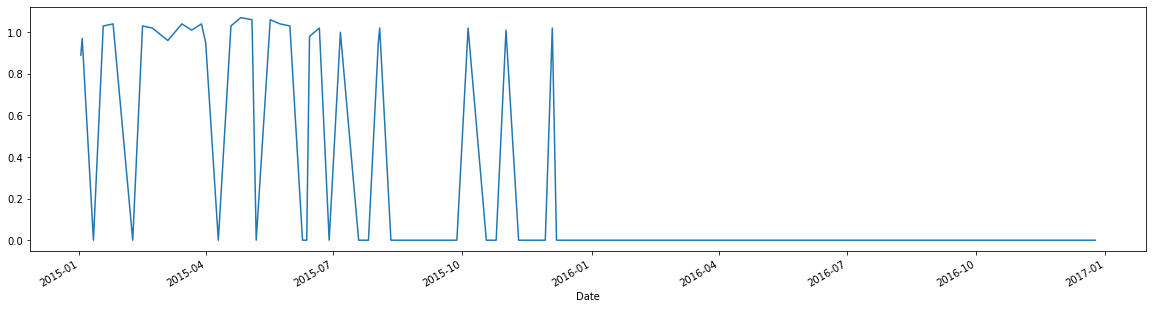

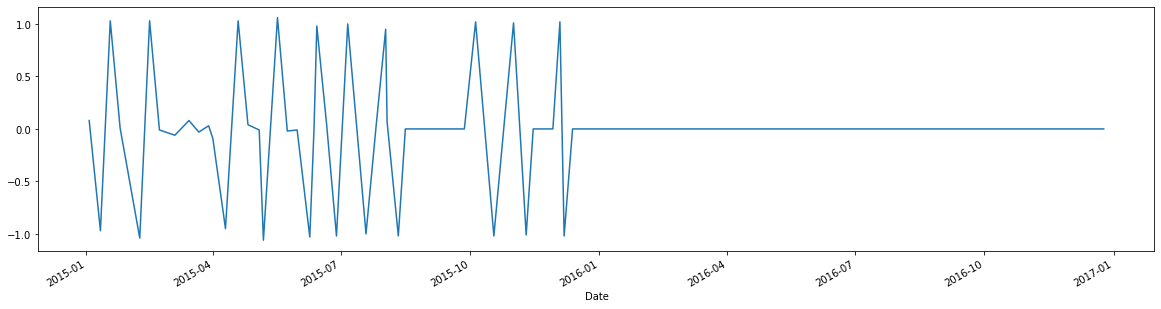

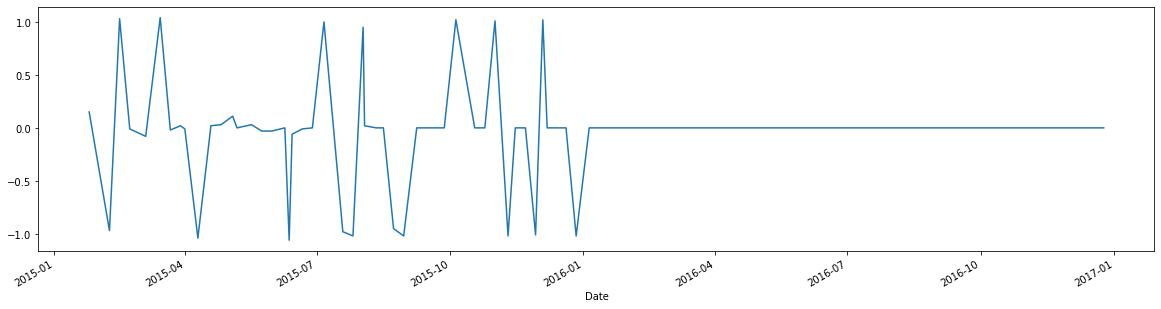

In [ ]:
for col in ts_totalUS.columns:
  ts_totalUS[col].plot(figsize=(20,5))
  plt.show()  

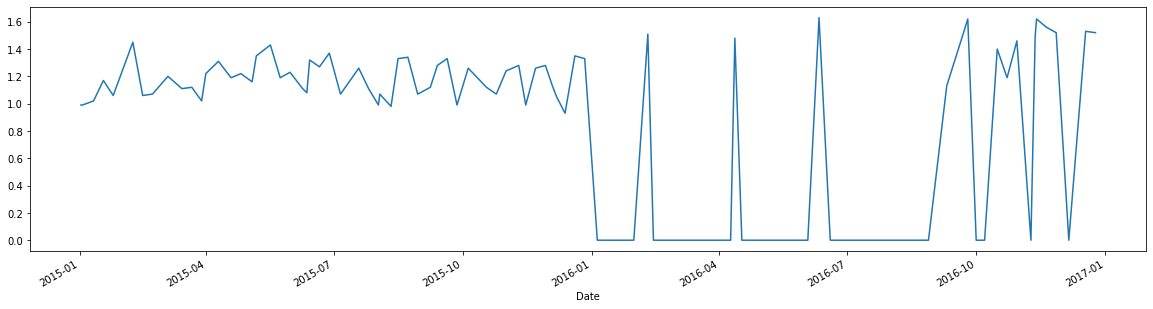

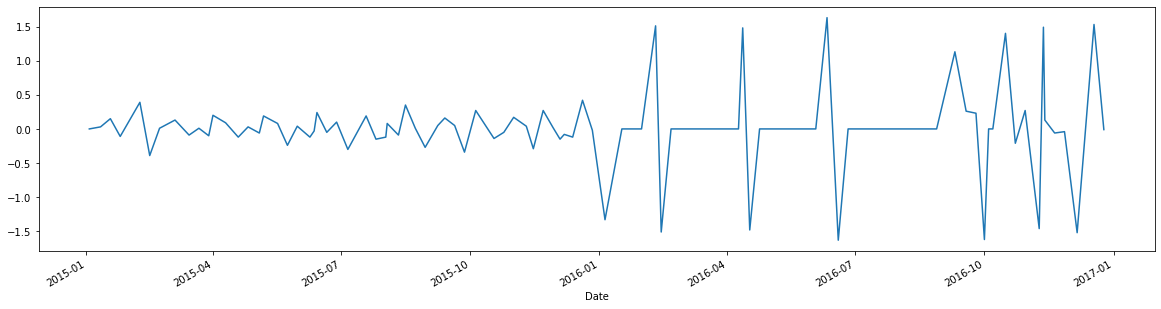

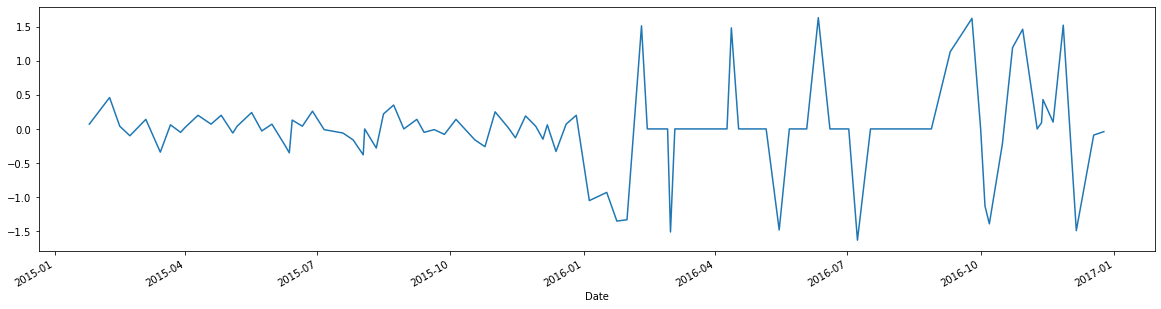

In [ ]:

for col in ts_Albany.columns:
  ts_Albany[col].plot(figsize=(20,5))
  plt.show()

## Auto Regressive Model

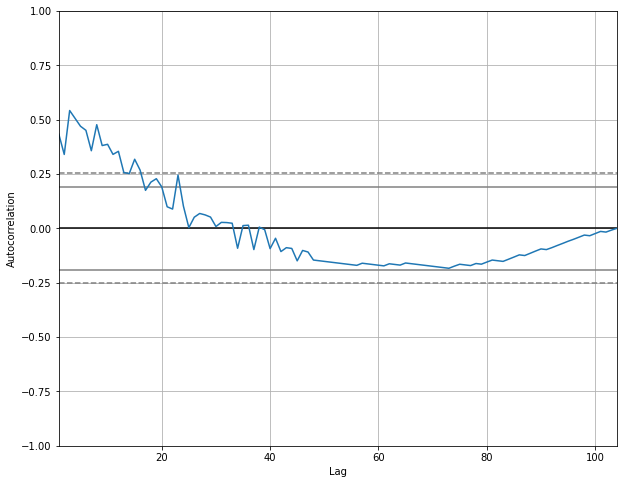

In [ ]:
plt.figure(figsize=(10,8))
autocorrelation_plot(ts_totalUS['AveragePrice_TotalUS'])
plt.show()

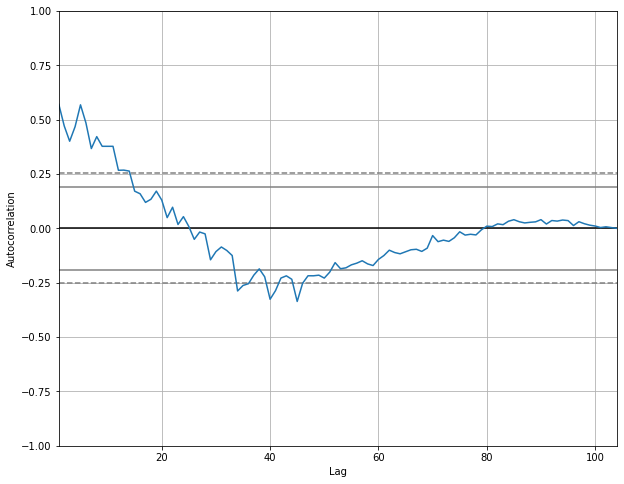

In [ ]:
plt.figure(figsize=(10,8))
autocorrelation_plot(ts_Albany['AveragePrice_Albany'])
plt.show()

In [ ]:
pip install statsmodels

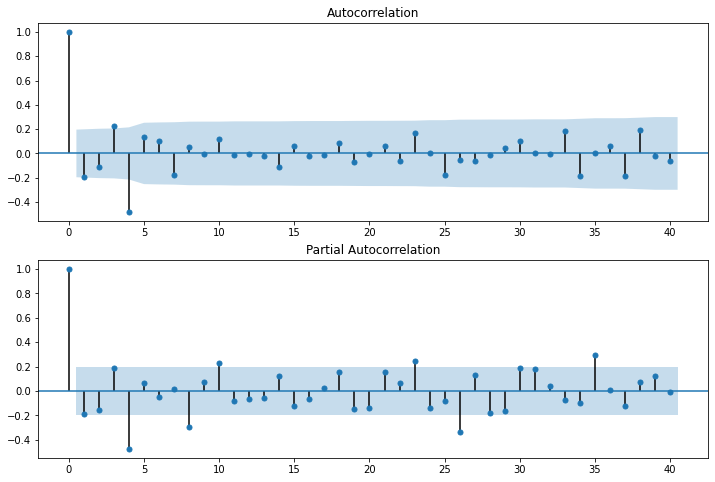

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ts_totalUS['AveragePrice_TotalUS_Seasonal_Difference'].dropna(), lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ts_totalUS['AveragePrice_TotalUS_Seasonal_Difference'].dropna(), lags=40, ax = ax2)


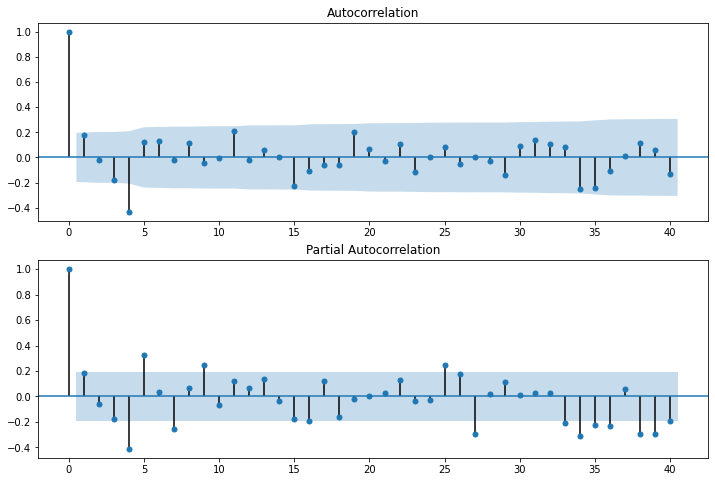

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ts_Albany['AveragePrice_Albany_Seasonal_Difference'].dropna(), lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ts_Albany['AveragePrice_Albany_Seasonal_Difference'].dropna(), lags = 40, ax = ax2)

In [ ]:
model_us = ARIMA(ts_totalUS['AveragePrice_TotalUS'], order = (10,2,1))
model_us_fit = model_us.fit()

model_albany = ARIMA(ts_Albany['AveragePrice_Albany'], order = (10,2,1))
model_albany_fit = model_albany.fit()

In [ ]:
model_us_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D2.AveragePrice_TotalUS   No. Observations:                  102
Model:                     ARIMA(10, 2, 1)   Log Likelihood                 -27.013
Method:                            css-mle   S.D. of innovations              0.300
Date:                     Sun, 07 Feb 2021   AIC                             80.026
Time:                             11:45:22   BIC                            114.151
Sample:                                  2   HQIC                            93.845
                                                                                   
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0002      0.000      0.909      0.366      -0.000       0.001
ar.L1.D2.AveragePrice_TotalUS     -0.9493      0.100     -9.476      0.000      -1.146      -0.753
ar.L2.D2.AveragePrice_TotalUS     -1.0946      0.137     -7.973      0.000      -1.364      -0.826
ar.L3.D2.AveragePrice_TotalUS     -0.8092      0.180     -4.484      0.000      -1.163      -0.455
ar.L4.D2.AveragePrice_TotalUS     -0.6302      0.197     -3.201      0.002      -1.016      -0.244
ar.L5.D2.AveragePrice_TotalUS     -0.4327      0.208     -2.085      0.040      -0.840      -0.026
ar.L6.D2.AveragePrice_TotalUS     -0.2900      0.214     -1.355      0.179      -0.709       0.129
ar.L7.D2.AveragePrice_TotalUS     -0.3790      0.206     -1.836      0.070      -0.784       0.026
ar.L8.D2.AveragePrice_TotalUS     -0.1524      0.189     -0.804      0.423      -0.524       0.219
ar.L9.D2.AveragePrice_TotalUS     -0.1914      0.146     -1.315      0.192      -0.477       0.094
ar.L10.D2.AveragePrice_TotalUS    -0.0087      0.106     -0.082      0.935      -0.216       0.198
ma.L1.D2.AveragePrice_TotalUS     -1.0000      0.032    -31.333      0.000      -1.063      -0.937
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1220           -0.0000j            1.1220           -0.5000
AR.2            -0.7887           -0.7993j            1.1229           -0.3739
AR.3            -0.7887           +0.7993j            1.1229            0.3739
AR.4             1.0166           -0.7846j            1.2842           -0.1046
AR.5             1.0166           +0.7846j            1.2842            0.1046
AR.6             0.2606           -1.1637j            1.1925           -0.2149
AR.7             0.2606           +1.1637j            1.1925            0.2149
AR.8            -0.2930           -1.2421j            1.2762           -0.2869
AR.9            -0.2930           +1.2421j            1.2762            0.2869
AR.10          -21.3748           -0.0000j           21.3748           -0.5000
MA.1             1.0000           +0.0000j            1.0000            0.0000
------------------------------------------------------------------------------
"""

In [ ]:
model_albany_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.AveragePrice_Albany   No. Observations:                  102
Model:                    ARIMA(10, 2, 1)   Log Likelihood                 -61.360
Method:                           css-mle   S.D. of innovations              0.428
Date:                    Sun, 07 Feb 2021   AIC                            148.720
Time:                            11:45:31   BIC                            182.844
Sample:                                 2   HQIC                           162.538
                                                                                  
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0005      0.001      0.409      0.683      -0.002       0.003
ar.L1.D2.AveragePrice_Albany     -0.8260      0.164     -5.025      0.000      -1.148      -0.504
ar.L2.D2.AveragePrice_Albany     -0.7380      0.243     -3.031      0.003      -1.215      -0.261
ar.L3.D2.AveragePrice_Albany     -0.9822      0.296     -3.322      0.001      -1.562      -0.403
ar.L4.D2.AveragePrice_Albany     -0.9235      0.343     -2.691      0.008      -1.596      -0.251
ar.L5.D2.AveragePrice_Albany     -0.5944      0.382     -1.554      0.124      -1.344       0.155
ar.L6.D2.AveragePrice_Albany     -0.5424      0.352     -1.543      0.126      -1.232       0.147
ar.L7.D2.AveragePrice_Albany     -0.6191      0.290     -2.134      0.036      -1.188      -0.050
ar.L8.D2.AveragePrice_Albany     -0.3321      0.249     -1.335      0.185      -0.820       0.155
ar.L9.D2.AveragePrice_Albany     -0.2443      0.191     -1.279      0.204      -0.619       0.130
ar.L10.D2.AveragePrice_Albany    -0.2529      0.129     -1.958      0.053      -0.506       0.000
ma.L1.D2.AveragePrice_Albany     -0.8040      0.159     -5.042      0.000      -1.116      -0.491
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1245           -0.2746j            1.1576           -0.4619
AR.2            -1.1245           +0.2746j            1.1576            0.4619
AR.3            -0.7516           -0.7880j            1.0890           -0.3712
AR.4            -0.7516           +0.7880j            1.0890            0.3712
AR.5             0.9194           -0.7008j            1.1560           -0.1037
AR.6             0.9194           +0.7008j            1.1560            0.1037
AR.7             0.4484           -1.0308j            1.1241           -0.1847
AR.8             0.4484           +1.0308j            1.1241            0.1847
AR.9             0.0252           -1.2136j            1.2139           -0.2467
AR.10            0.0252           +1.2136j            1.2139            0.2467
MA.1             1.2439           +0.0000j            1.2439            0.0000
------------------------------------------------------------------------------
"""

In [ ]:
ts_totalUS['forecast'] = model_us_fit.predict(dynamic=True)
ts_Albany['forecast'] = model_albany_fit.predict(dynamic=True)

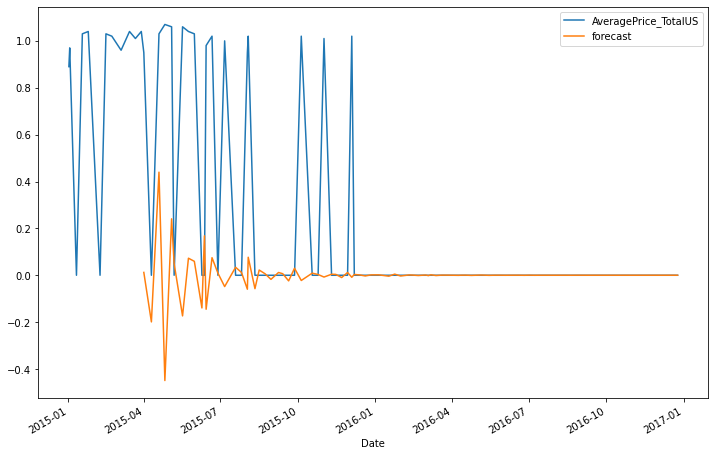

In [ ]:
ts_totalUS[['AveragePrice_TotalUS','forecast']].plot(figsize=(12,8))

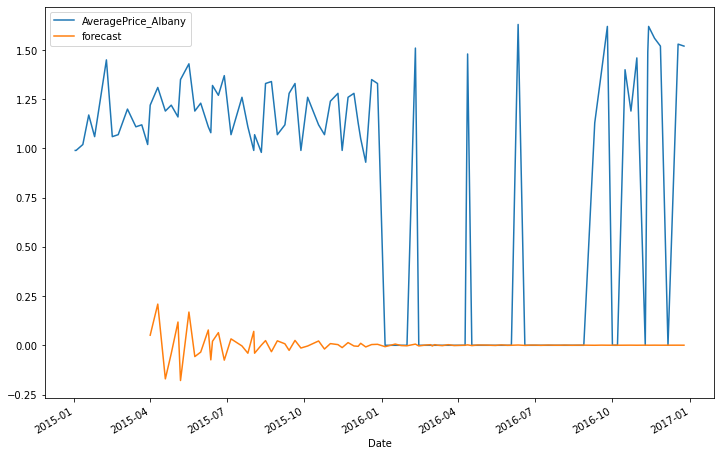

In [ ]:
ts_Albany[['AveragePrice_Albany','forecast']].plot(figsize=(12,8))

In [ ]:
model_us = sm.tsa.statespace.SARIMAX(ts_totalUS['AveragePrice_TotalUS'], order=(10,2,0), seasonal_order=(10,2,0,7))
mod_us_result = model_us.fit()

model_albany = sm.tsa.statespace.SARIMAX(ts_Albany['AveragePrice_Albany'], order=(11,2,0), seasonal_order=(10,2,0,7))
mod_albany_result = model_albany.fit()

In [ ]:
ts_totalUS['forecast1'] = mod_us_result.predict(dynamic=True)
ts_Albany['forecast1'] = mod_albany_result.predict(dynamic=True)

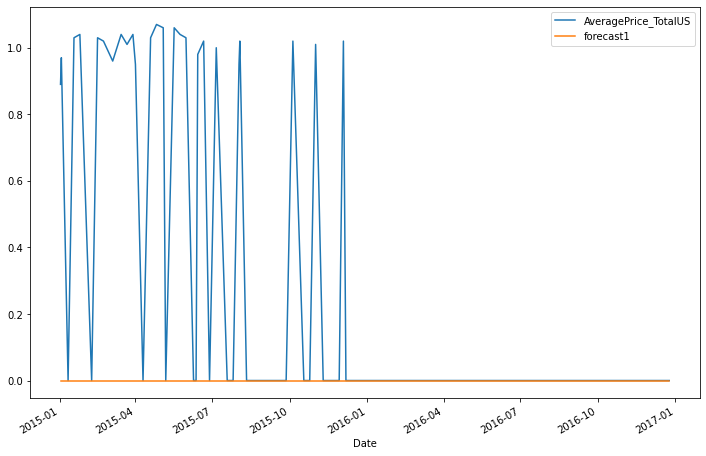

In [ ]:
ts_totalUS[['AveragePrice_TotalUS','forecast1']].plot(figsize=(12,8))

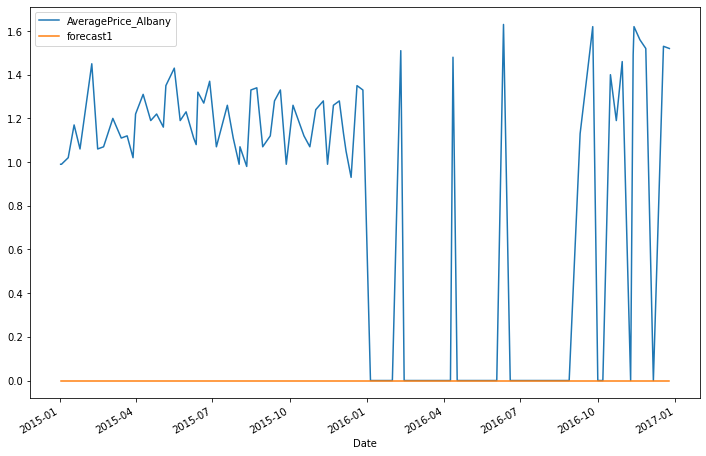

In [ ]:
ts_Albany[['AveragePrice_Albany','forecast1']].plot(figsize=(12,8))

Observations:
1. The time series model is not able to capture the function in the dataset.